In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
df2023 = pd.read_csv("2023_v3.csv")
df2021 = pd.read_csv("2021_v3.csv")

# Deleting outliers and manual EDA

## 2021 DATA

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
#plt.style.use('seaborn')
%matplotlib inline

In [17]:
df2021

Area  Construction  Room  Warehouse  Parking  Elevator  \
0          1          1386     1       True     True     False   
1          1          1392     4       True     True     False   
2          4          1370     1       True     True     False   
3          4          1392     1       True     True      True   
4          4          1393     2       True     True      True   
...      ...           ...   ...        ...      ...       ...   
75161  10000          1398     3       True     True      True   
75162  11000          1399     4       True     True      True   
75163  12000          1399     4       True     True      True   
75164  20000          1399     4       True     True      True   
75165  35000          1399     4       True     True      True   

             District         Price  
0              جوادیه  2.300000e+09  
1            قیام‌دشت  4.200000e+09  
2             اکباتان  6.000000e+08  
3                  جی  9.200000e+08  
4      جنت‌آباد مرکزی  3.200000e+09  
...               ...           ...  
75161        پاسداران  5.000000e+11  
75162  جنت‌آباد مرکزی  4.180000e+11  
75163         نیاوران  1.400000e+11  
75164             ونک  7.000000e+10  
75165           چیتگر  1.800000e+11  

[75166 rows x 8 columns]

In [18]:
df2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75166 entries, 0 to 75165
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Area          75166 non-null  int64  
 1   Construction  75166 non-null  int64  
 2   Room          75166 non-null  int64  
 3   Warehouse     75166 non-null  bool   
 4   Parking       75166 non-null  bool   
 5   Elevator      75166 non-null  bool   
 6   District      75166 non-null  object 
 7   Price         75166 non-null  float64
dtypes: bool(3), float64(1), int64(3), object(1)
memory usage: 3.1+ MB


In [19]:
df2021.describe()

Area  Construction          Room         Price
count  75166.000000  75166.000000  75166.000000  7.516600e+04
mean     100.928971   1389.750765      1.941450  4.560537e+09
std      200.640033      7.219981      0.767577  1.136518e+10
min        1.000000   1370.000000      0.000000  5.700000e+06
25%       61.000000   1385.000000      1.000000  1.100000e+09
50%       81.000000   1390.000000      2.000000  2.250000e+09
75%      115.000000   1396.000000      2.000000  4.700000e+09
max    35000.000000   1399.000000      4.000000  5.000000e+11

In [20]:
df2021["Age"] = df2021.Construction.apply(lambda x : 1399 - x)
df2021

Area  Construction  Room  Warehouse  Parking  Elevator  \
0          1          1386     1       True     True     False   
1          1          1392     4       True     True     False   
2          4          1370     1       True     True     False   
3          4          1392     1       True     True      True   
4          4          1393     2       True     True      True   
...      ...           ...   ...        ...      ...       ...   
75161  10000          1398     3       True     True      True   
75162  11000          1399     4       True     True      True   
75163  12000          1399     4       True     True      True   
75164  20000          1399     4       True     True      True   
75165  35000          1399     4       True     True      True   

             District         Price  Age  
0              جوادیه  2.300000e+09   13  
1            قیام‌دشت  4.200000e+09    7  
2             اکباتان  6.000000e+08   29  
3                  جی  9.200000e+08    7  
4      جنت‌آباد مرکزی  3.200000e+09    6  
...               ...           ...  ...  
75161        پاسداران  5.000000e+11    1  
75162  جنت‌آباد مرکزی  4.180000e+11    0  
75163         نیاوران  1.400000e+11    0  
75164             ونک  7.000000e+10    0  
75165           چیتگر  1.800000e+11    0  

[75166 rows x 9 columns]

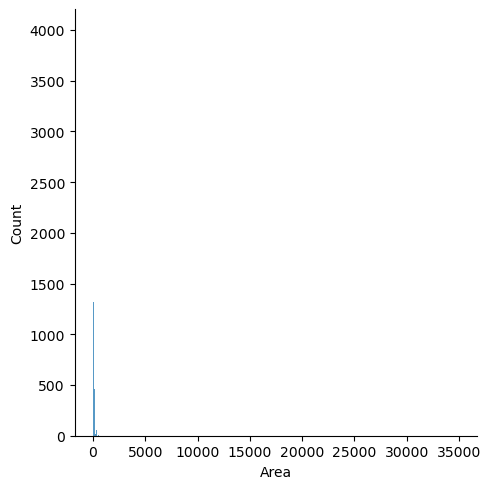

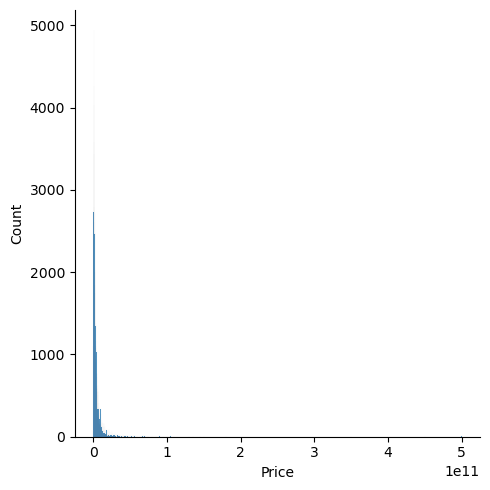

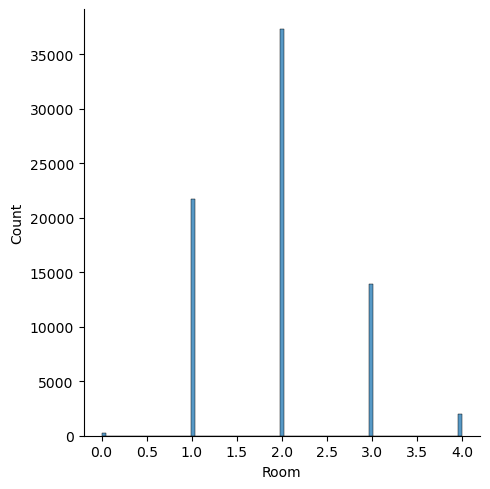

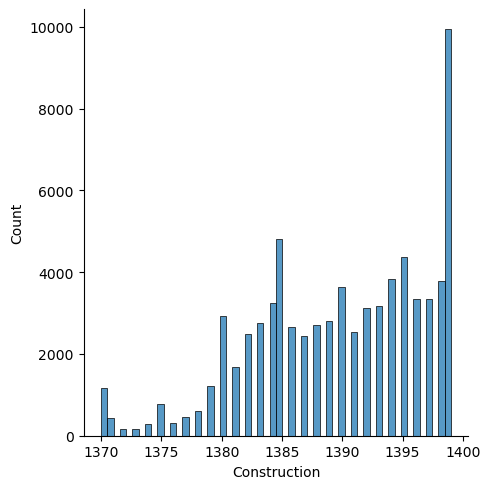

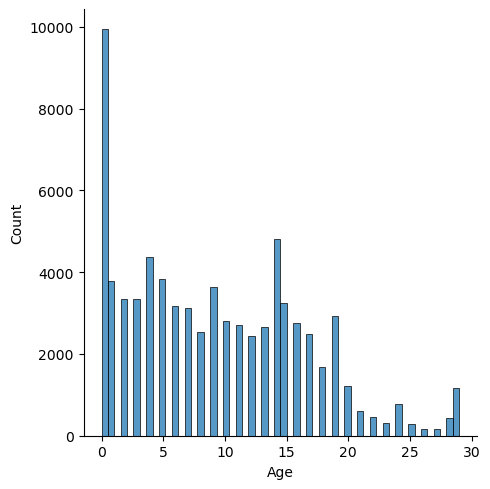

In [21]:
sns.displot(df2021, x="Area")
sns.displot(df2021, x="Price")
sns.displot(df2021, x="Room")
sns.displot(df2021, x="Construction")
sns.displot(df2021, x="Age")

<Axes: xlabel='Area'>

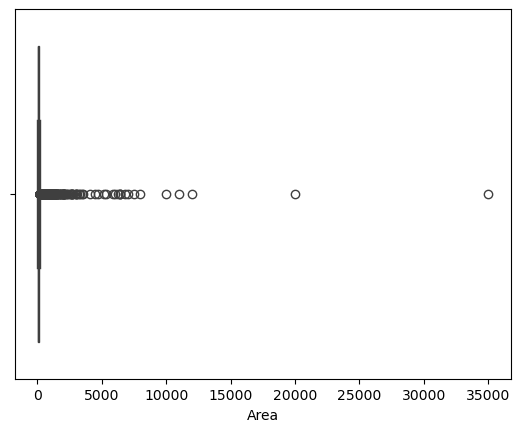

In [22]:
sns.boxplot(df2021, x="Area")

<Axes: xlabel='Price'>

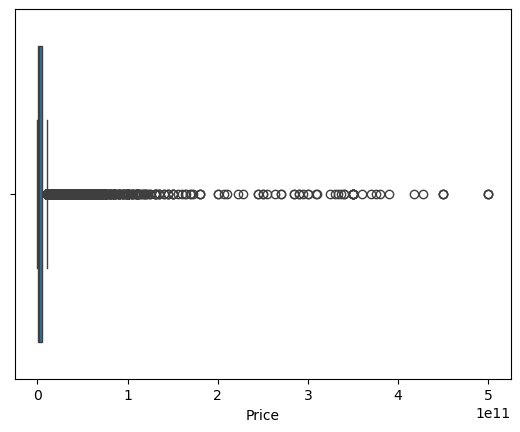

In [23]:
sns.boxplot(df2021, x="Price")

In [30]:
df2021.corr()

C:\Users\mynam\AppData\Local\Temp\ipykernel_16056\3985612499.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df2021.corr()


Area  Construction      Room  Warehouse   Parking  Elevator  \
Area          1.000000      0.066209  0.259052   0.053834  0.097807  0.094563   
Construction  0.066209      1.000000  0.139496   0.018464  0.240499  0.532545   
Room          0.259052      0.139496  1.000000   0.194864  0.360779  0.311955   
Warehouse     0.053834      0.018464  0.194864   1.000000  0.254125  0.129808   
Parking       0.097807      0.240499  0.360779   0.254125  1.000000  0.401240   
Elevator      0.094563      0.532545  0.311955   0.129808  0.401240  1.000000   
Price         0.532501      0.107276  0.382474   0.099087  0.159097  0.158203   
Age          -0.066209     -1.000000 -0.139496  -0.018464 -0.240499 -0.532545   

                 Price       Age  
Area          0.532501 -0.066209  
Construction  0.107276 -1.000000  
Room          0.382474 -0.139496  
Warehouse     0.099087 -0.018464  
Parking       0.159097 -0.240499  
Elevator      0.158203 -0.532545  
Price         1.000000 -0.107276  
Age          -0.107276  1.000000

<Axes: >

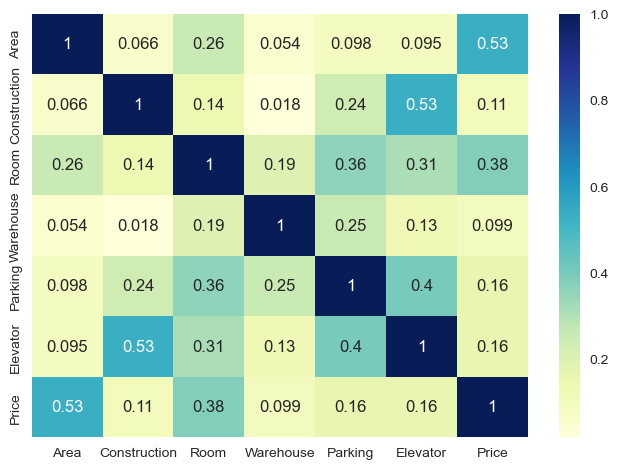

In [132]:
sns.heatmap(df2021.drop("Age",axis=1).corr(),annot=True,cmap="YlGnBu")

### Remove outliers using IQR(non-parametic)

In [32]:
Q3_area = df2021["Area"].quantile(q=0.75,interpolation="midpoint") 
Q1_area = df2021["Area"].quantile(q=0.25,interpolation="midpoint") 
IQR_area = Q3_area - Q1_area
df20211 = df2021[df2021.Area.between(Q1_area - 1.5*IQR_area , Q3_area + 1.5*IQR_area)]
df20211 = df20211.reset_index(drop=True)
df20211

Area  Construction  Room  Warehouse  Parking  Elevator  \
0         1          1386     1       True     True     False   
1         1          1392     4       True     True     False   
2         4          1370     1       True     True     False   
3         4          1392     1       True     True      True   
4         4          1393     2       True     True      True   
...     ...           ...   ...        ...      ...       ...   
71252   196          1398     3       True     True      True   
71253   196          1399     3       True     True      True   
71254   196          1399     3       True     True      True   
71255   196          1399     3       True     True      True   
71256   196          1399     4       True     True      True   

                     District         Price  Age  
0                      جوادیه  2.300000e+09   13  
1                    قیام‌دشت  4.200000e+09    7  
2                     اکباتان  6.000000e+08   29  
3                          جی  9.200000e+08    7  
4              جنت‌آباد مرکزی  3.200000e+09    6  
...                       ...           ...  ...  
71252                    کوهک  9.200000e+09    1  
71253  دریاچه شهدای خلیج فارس  5.150000e+09    0  
71254                 سهروردی  1.000000e+10    0  
71255                شهرک غرب  1.568000e+10    0  
71256                   چیتگر  5.900000e+09    0  

[71257 rows x 9 columns]

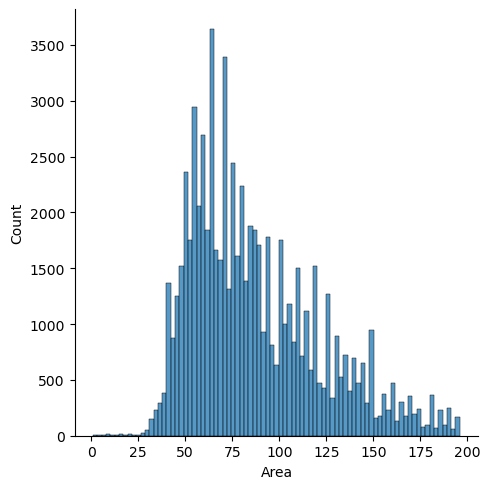

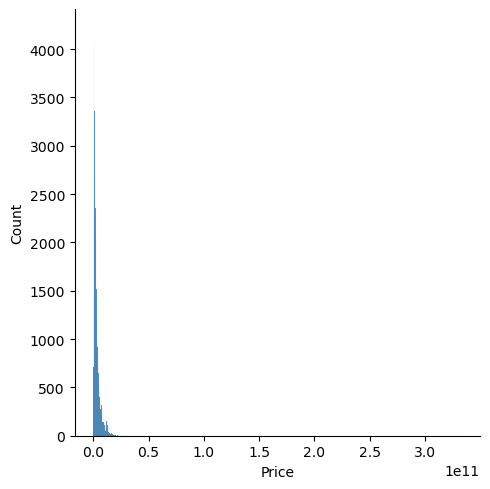

In [33]:
sns.displot(df20211, x="Area")
sns.displot(df20211, x="Price")

In [62]:
Q3_price = df2021["Price"].quantile(q=0.75,interpolation="midpoint") 
Q1_price = df2021["Price"].quantile(q=0.25,interpolation="midpoint") 
IQR_price = Q3_price - Q1_price
df20212 = df20211[df20211.Price.between(Q1_price - 1.5*IQR_price , Q3_price + 1.5*IQR_price)]
df20212 = df20212.reset_index(drop=True)
df20212

Area  Construction  Room  Warehouse  Parking  Elevator  \
0         1          1386     1       True     True     False   
1         1          1392     4       True     True     False   
2         4          1370     1       True     True     False   
3         4          1392     1       True     True      True   
4         4          1393     2       True     True      True   
...     ...           ...   ...        ...      ...       ...   
68083   196          1397     3       True     True      True   
68084   196          1398     3       True     True      True   
68085   196          1399     3       True     True      True   
68086   196          1399     3       True     True      True   
68087   196          1399     4       True     True      True   

                     District         Price  Age  
0                      جوادیه  2.300000e+09   13  
1                    قیام‌دشت  4.200000e+09    7  
2                     اکباتان  6.000000e+08   29  
3                          جی  9.200000e+08    7  
4              جنت‌آباد مرکزی  3.200000e+09    6  
...                       ...           ...  ...  
68083                  شهریار  2.842000e+09    2  
68084                    کوهک  9.200000e+09    1  
68085  دریاچه شهدای خلیج فارس  5.150000e+09    0  
68086                 سهروردی  1.000000e+10    0  
68087                   چیتگر  5.900000e+09    0  

[68088 rows x 9 columns]

<Axes: xlabel='Area'>

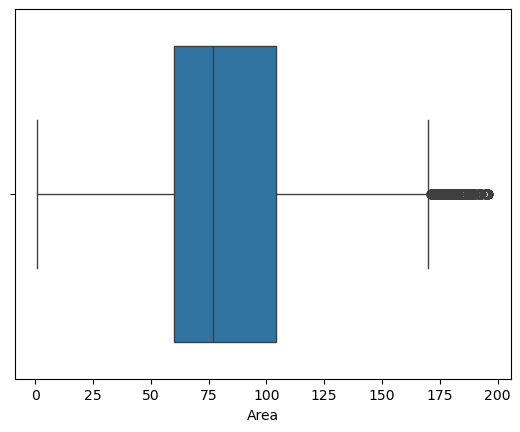

In [35]:
sns.boxplot(df20212, x="Area")

<Axes: xlabel='Price'>

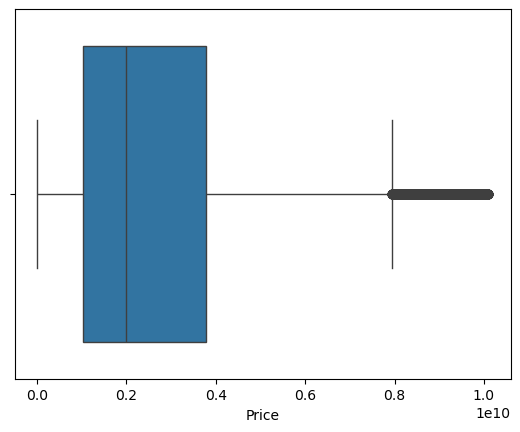

In [36]:
sns.boxplot(df20212, x="Price")

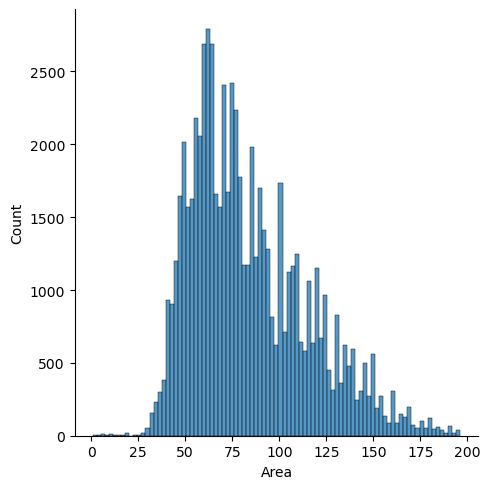

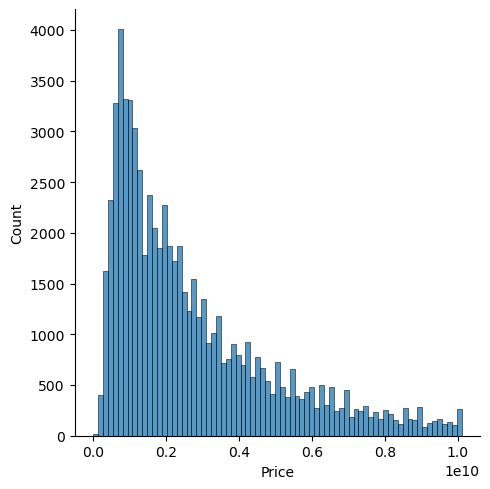

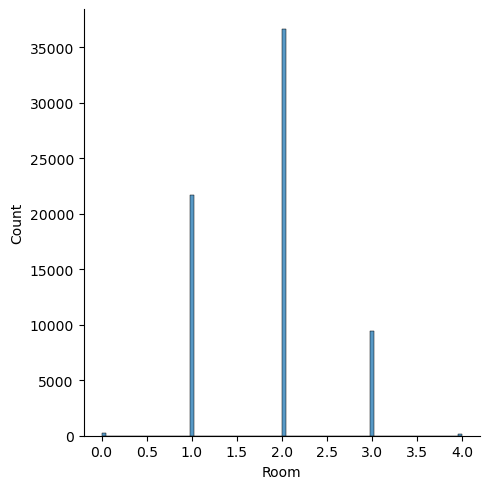

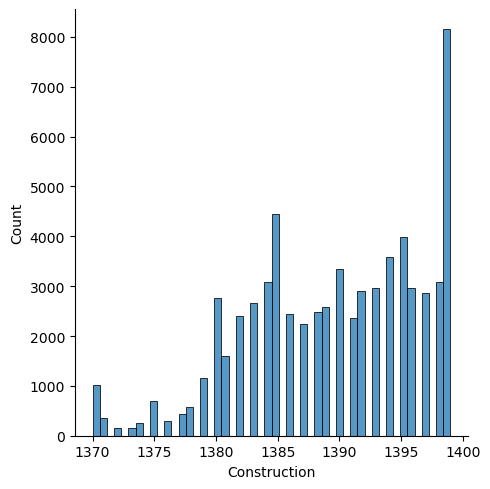

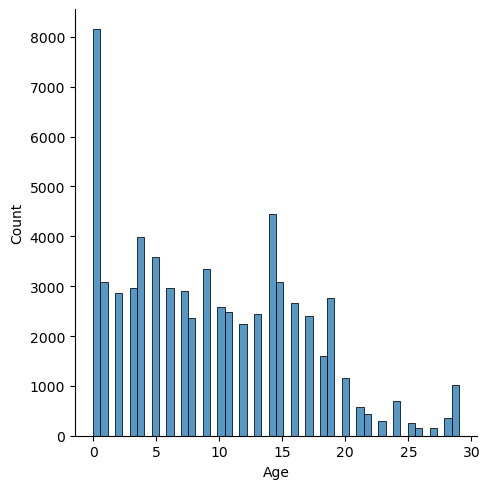

In [37]:
sns.displot(df20212, x="Area")
sns.displot(df20212, x="Price")
sns.displot(df20212, x="Room")
sns.displot(df20212, x="Construction")
sns.displot(df20212, x="Age")

### New Approach:

In [38]:
ndf2021 = df2021.copy()

In [39]:
ndf2021["Price_adj"] = ndf2021.Price / ndf2021.Area
ndf2021

Area  Construction  Room  Warehouse  Parking  Elevator  \
0          1          1386     1       True     True     False   
1          1          1392     4       True     True     False   
2          4          1370     1       True     True     False   
3          4          1392     1       True     True      True   
4          4          1393     2       True     True      True   
...      ...           ...   ...        ...      ...       ...   
75161  10000          1398     3       True     True      True   
75162  11000          1399     4       True     True      True   
75163  12000          1399     4       True     True      True   
75164  20000          1399     4       True     True      True   
75165  35000          1399     4       True     True      True   

             District         Price  Age     Price_adj  
0              جوادیه  2.300000e+09   13  2.300000e+09  
1            قیام‌دشت  4.200000e+09    7  4.200000e+09  
2             اکباتان  6.000000e+08   29  1.500000e+08  
3                  جی  9.200000e+08    7  2.300000e+08  
4      جنت‌آباد مرکزی  3.200000e+09    6  8.000000e+08  
...               ...           ...  ...           ...  
75161        پاسداران  5.000000e+11    1  5.000000e+07  
75162  جنت‌آباد مرکزی  4.180000e+11    0  3.800000e+07  
75163         نیاوران  1.400000e+11    0  1.166667e+07  
75164             ونک  7.000000e+10    0  3.500000e+06  
75165           چیتگر  1.800000e+11    0  5.142857e+06  

[75166 rows x 10 columns]

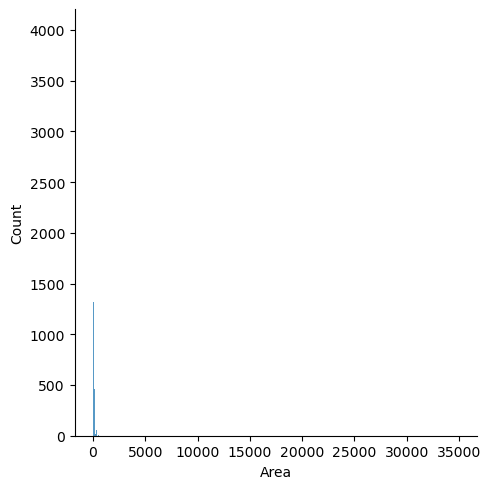

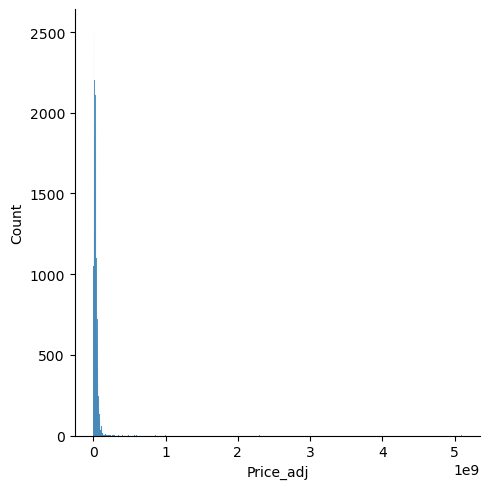

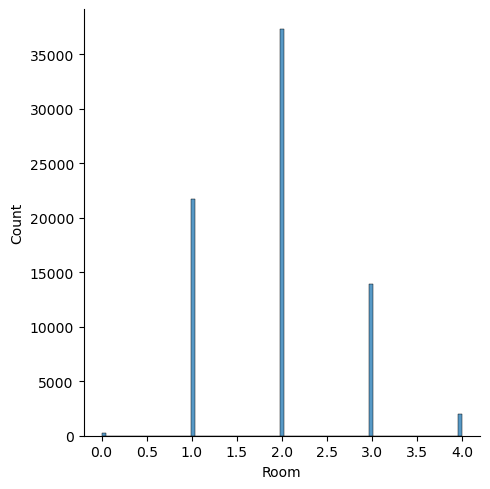

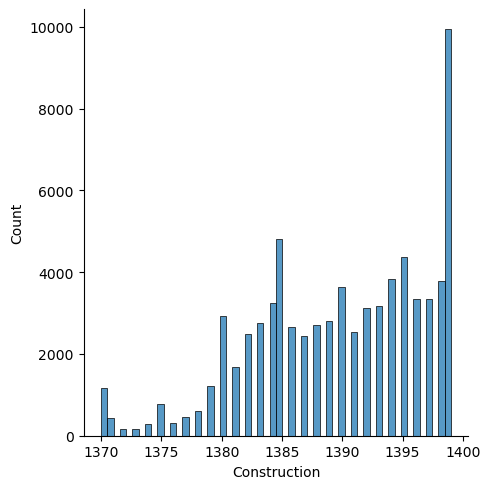

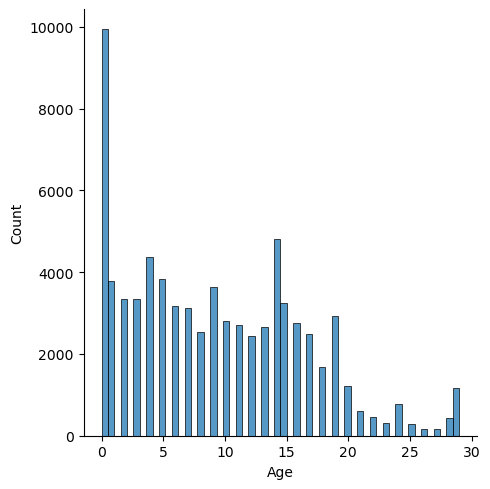

In [40]:
sns.displot(ndf2021, x="Area")
sns.displot(ndf2021, x="Price_adj")
sns.displot(ndf2021, x="Room")
sns.displot(ndf2021, x="Construction")
sns.displot(ndf2021, x="Age")

In [41]:
Q3_price_adj = ndf2021["Price_adj"].quantile(q=0.75,interpolation="midpoint") 
Q1_price_adj = ndf2021["Price_adj"].quantile(q=0.25,interpolation="midpoint") 
IQR_price = Q3_price_adj - Q1_price_adj
ndf20211 = ndf2021[ndf2021.Price_adj.between(Q1_price_adj - 1.5*IQR_price , Q3_price_adj + 1.5*IQR_price)]
ndf20211 = ndf20211.reset_index(drop=True)
ndf20211

Area  Construction  Room  Warehouse  Parking  Elevator  \
0          5          1395     1       True    False     False   
1          6          1399     2       True     True      True   
2          7          1392     2      False    False      True   
3          7          1399     2       True     True      True   
4          9          1399     0       True     True      True   
...      ...           ...   ...        ...      ...       ...   
72008  10000          1398     3       True     True      True   
72009  11000          1399     4       True     True      True   
72010  12000          1399     4       True     True      True   
72011  20000          1399     4       True     True      True   
72012  35000          1399     4       True     True      True   

                     District         Price  Age     Price_adj  
0                   رباط کریم  2.300000e+08    4  4.600000e+07  
1      دریاچه شهدای خلیج فارس  8.000000e+07    0  1.333333e+07  
2                        پرند  4.250000e+07    7  6.071429e+06  
3                        پرند  2.670000e+08    0  3.814286e+07  
4                       چیتگر  9.650000e+07    0  1.072222e+07  
...                       ...           ...  ...           ...  
72008                پاسداران  5.000000e+11    1  5.000000e+07  
72009          جنت‌آباد مرکزی  4.180000e+11    0  3.800000e+07  
72010                 نیاوران  1.400000e+11    0  1.166667e+07  
72011                     ونک  7.000000e+10    0  3.500000e+06  
72012                   چیتگر  1.800000e+11    0  5.142857e+06  

[72013 rows x 10 columns]

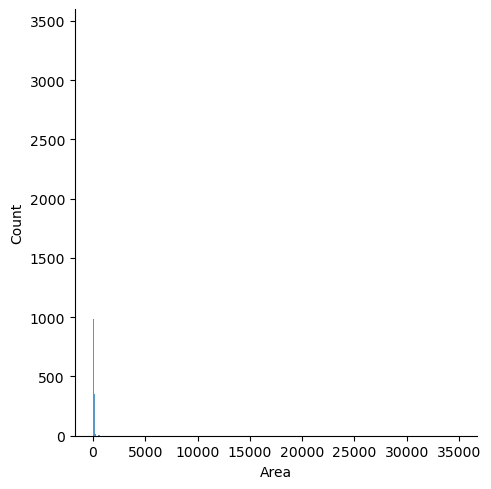

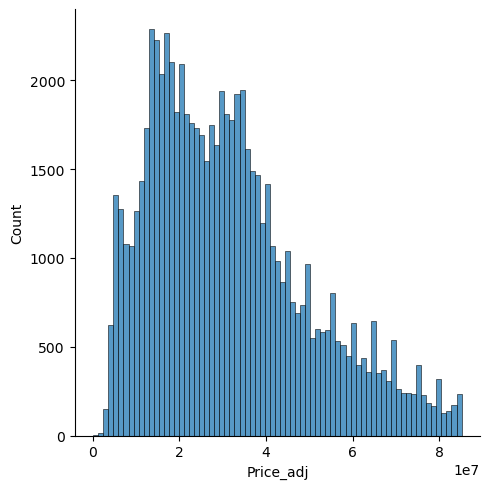

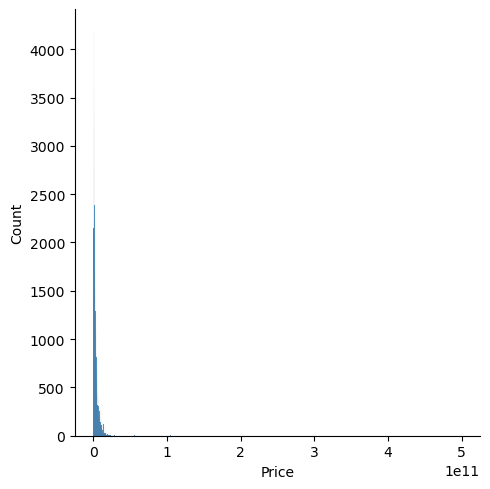

In [42]:
sns.displot(ndf20211, x="Area")
sns.displot(ndf20211, x="Price_adj")
sns.displot(ndf20211, x="Price")

In [43]:
Q3_Area = ndf2021["Area"].quantile(q=0.75,interpolation="midpoint") 
Q1_Area = ndf2021["Area"].quantile(q=0.25,interpolation="midpoint") 
IQR_price = Q3_Area - Q1_Area
ndf20212 = ndf20211[ndf20211.Area.between(Q1_Area - 1.5*IQR_price , Q3_Area + 1.5*IQR_price)]
ndf20212 = ndf20212.reset_index(drop=True)
ndf20212

Area  Construction  Room  Warehouse  Parking  Elevator  \
0         5          1395     1       True    False     False   
1         6          1399     2       True     True      True   
2         7          1392     2      False    False      True   
3         7          1399     2       True     True      True   
4         9          1399     0       True     True      True   
...     ...           ...   ...        ...      ...       ...   
69729   196          1398     3       True     True      True   
69730   196          1399     3       True     True      True   
69731   196          1399     3       True     True      True   
69732   196          1399     3       True     True      True   
69733   196          1399     4       True     True      True   

                     District         Price  Age     Price_adj  
0                   رباط کریم  2.300000e+08    4  4.600000e+07  
1      دریاچه شهدای خلیج فارس  8.000000e+07    0  1.333333e+07  
2                        پرند  4.250000e+07    7  6.071429e+06  
3                        پرند  2.670000e+08    0  3.814286e+07  
4                       چیتگر  9.650000e+07    0  1.072222e+07  
...                       ...           ...  ...           ...  
69729                    کوهک  9.200000e+09    1  4.693878e+07  
69730  دریاچه شهدای خلیج فارس  5.150000e+09    0  2.627551e+07  
69731                 سهروردی  1.000000e+10    0  5.102041e+07  
69732                شهرک غرب  1.568000e+10    0  8.000000e+07  
69733                   چیتگر  5.900000e+09    0  3.010204e+07  

[69734 rows x 10 columns]

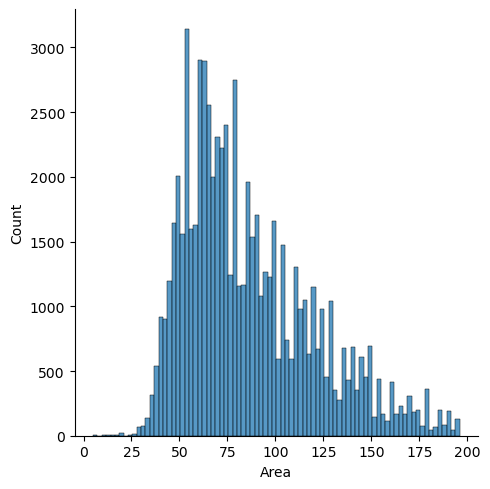

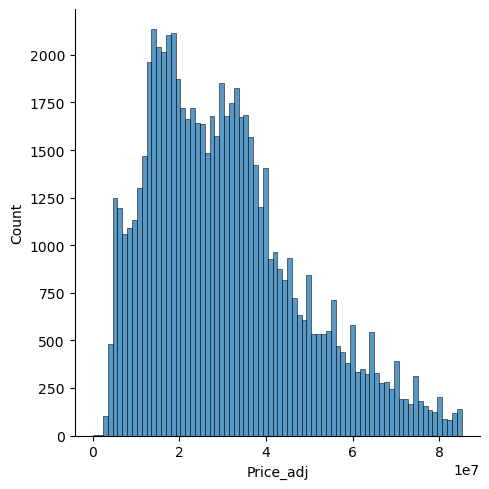

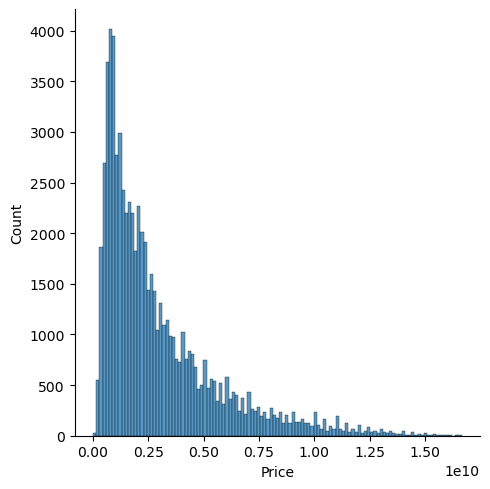

In [44]:
sns.displot(ndf20212, x="Area")
sns.displot(ndf20212, x="Price_adj")
sns.displot(ndf20212, x="Price")

In [45]:
ndf20212.describe()

Area  Construction          Room         Price           Age  \
count  69734.000000  69734.000000  69734.000000  6.973400e+04  69734.000000   
mean      86.329165   1389.540296      1.850647  2.961125e+09      9.459704   
std       33.943783      7.145732      0.687977  2.651101e+09      7.145732   
min        5.000000   1370.000000      0.000000  5.700000e+06      0.000000   
25%       60.000000   1384.000000      1.000000  1.050000e+09      3.000000   
50%       78.000000   1390.000000      2.000000  2.080000e+09      9.000000   
75%      107.000000   1396.000000      2.000000  4.000000e+09     15.000000   
max      196.000000   1399.000000      4.000000  1.666000e+10     29.000000   

          Price_adj  
count  6.973400e+04  
mean   3.066781e+07  
std    1.750593e+07  
min    6.477273e+04  
25%    1.696078e+07  
50%    2.805926e+07  
75%    4.016772e+07  
max    8.518519e+07

In [46]:
ndf20211.to_csv("2021_v4.csv",index=False)
ndf20212.to_csv("2021_v4_Area.csv",index=False)

In [47]:
# df20212 = ndf20212.copy()

### .........................................................................................

In [64]:
df20212.corr()

Area  Construction      Room  Warehouse   Parking  Elevator  \
Area          1.000000      0.138058  0.794179   0.175238  0.365443  0.329058   
Construction  0.138058      1.000000  0.106854   0.004048  0.234164  0.537575   
Room          0.794179      0.106854  1.000000   0.169280  0.337940  0.275163   
Warehouse     0.175238      0.004048  0.169280   1.000000  0.239878  0.111838   
Parking       0.365443      0.234164  0.337940   0.239878  1.000000  0.384191   
Elevator      0.329058      0.537575  0.275163   0.111838  0.384191  1.000000   
Price         0.755312      0.076346  0.602207   0.235019  0.408270  0.365258   
Age          -0.138058     -1.000000 -0.106854  -0.004048 -0.234164 -0.537575   

                 Price       Age  
Area          0.755312 -0.138058  
Construction  0.076346 -1.000000  
Room          0.602207 -0.106854  
Warehouse     0.235019 -0.004048  
Parking       0.408270 -0.234164  
Elevator      0.365258 -0.537575  
Price         1.000000 -0.076346  
Age          -0.076346  1.000000

<Axes: >

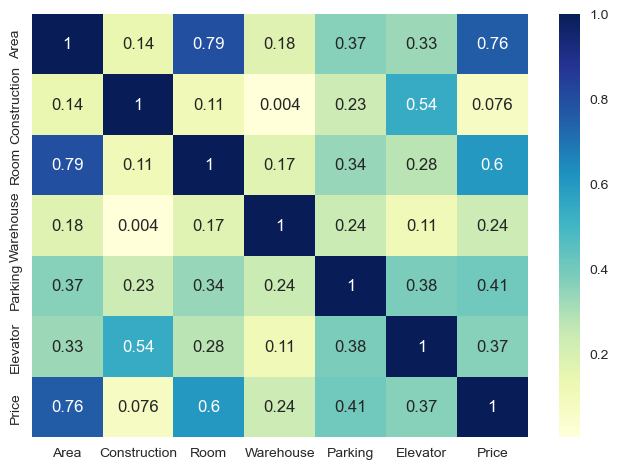

In [134]:
sns.heatmap(df20212.drop("Age",axis=1).corr(),annot=True,cmap="YlGnBu")

In [66]:
df20212.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68088 entries, 0 to 68087
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Area          68088 non-null  int64  
 1   Construction  68088 non-null  int64  
 2   Room          68088 non-null  int64  
 3   Warehouse     68088 non-null  bool   
 4   Parking       68088 non-null  bool   
 5   Elevator      68088 non-null  bool   
 6   District      68088 non-null  object 
 7   Price         68088 non-null  float64
 8   Age           68088 non-null  int64  
dtypes: bool(3), float64(1), int64(4), object(1)
memory usage: 3.3+ MB


In [51]:
# s = c2df20212.copy()
# s[["Warehouse","Parking","Elevator"]] = s[["Warehouse","Parking","Elevator"]].astype(object)
# s.info()
# sns.pairplot(s)

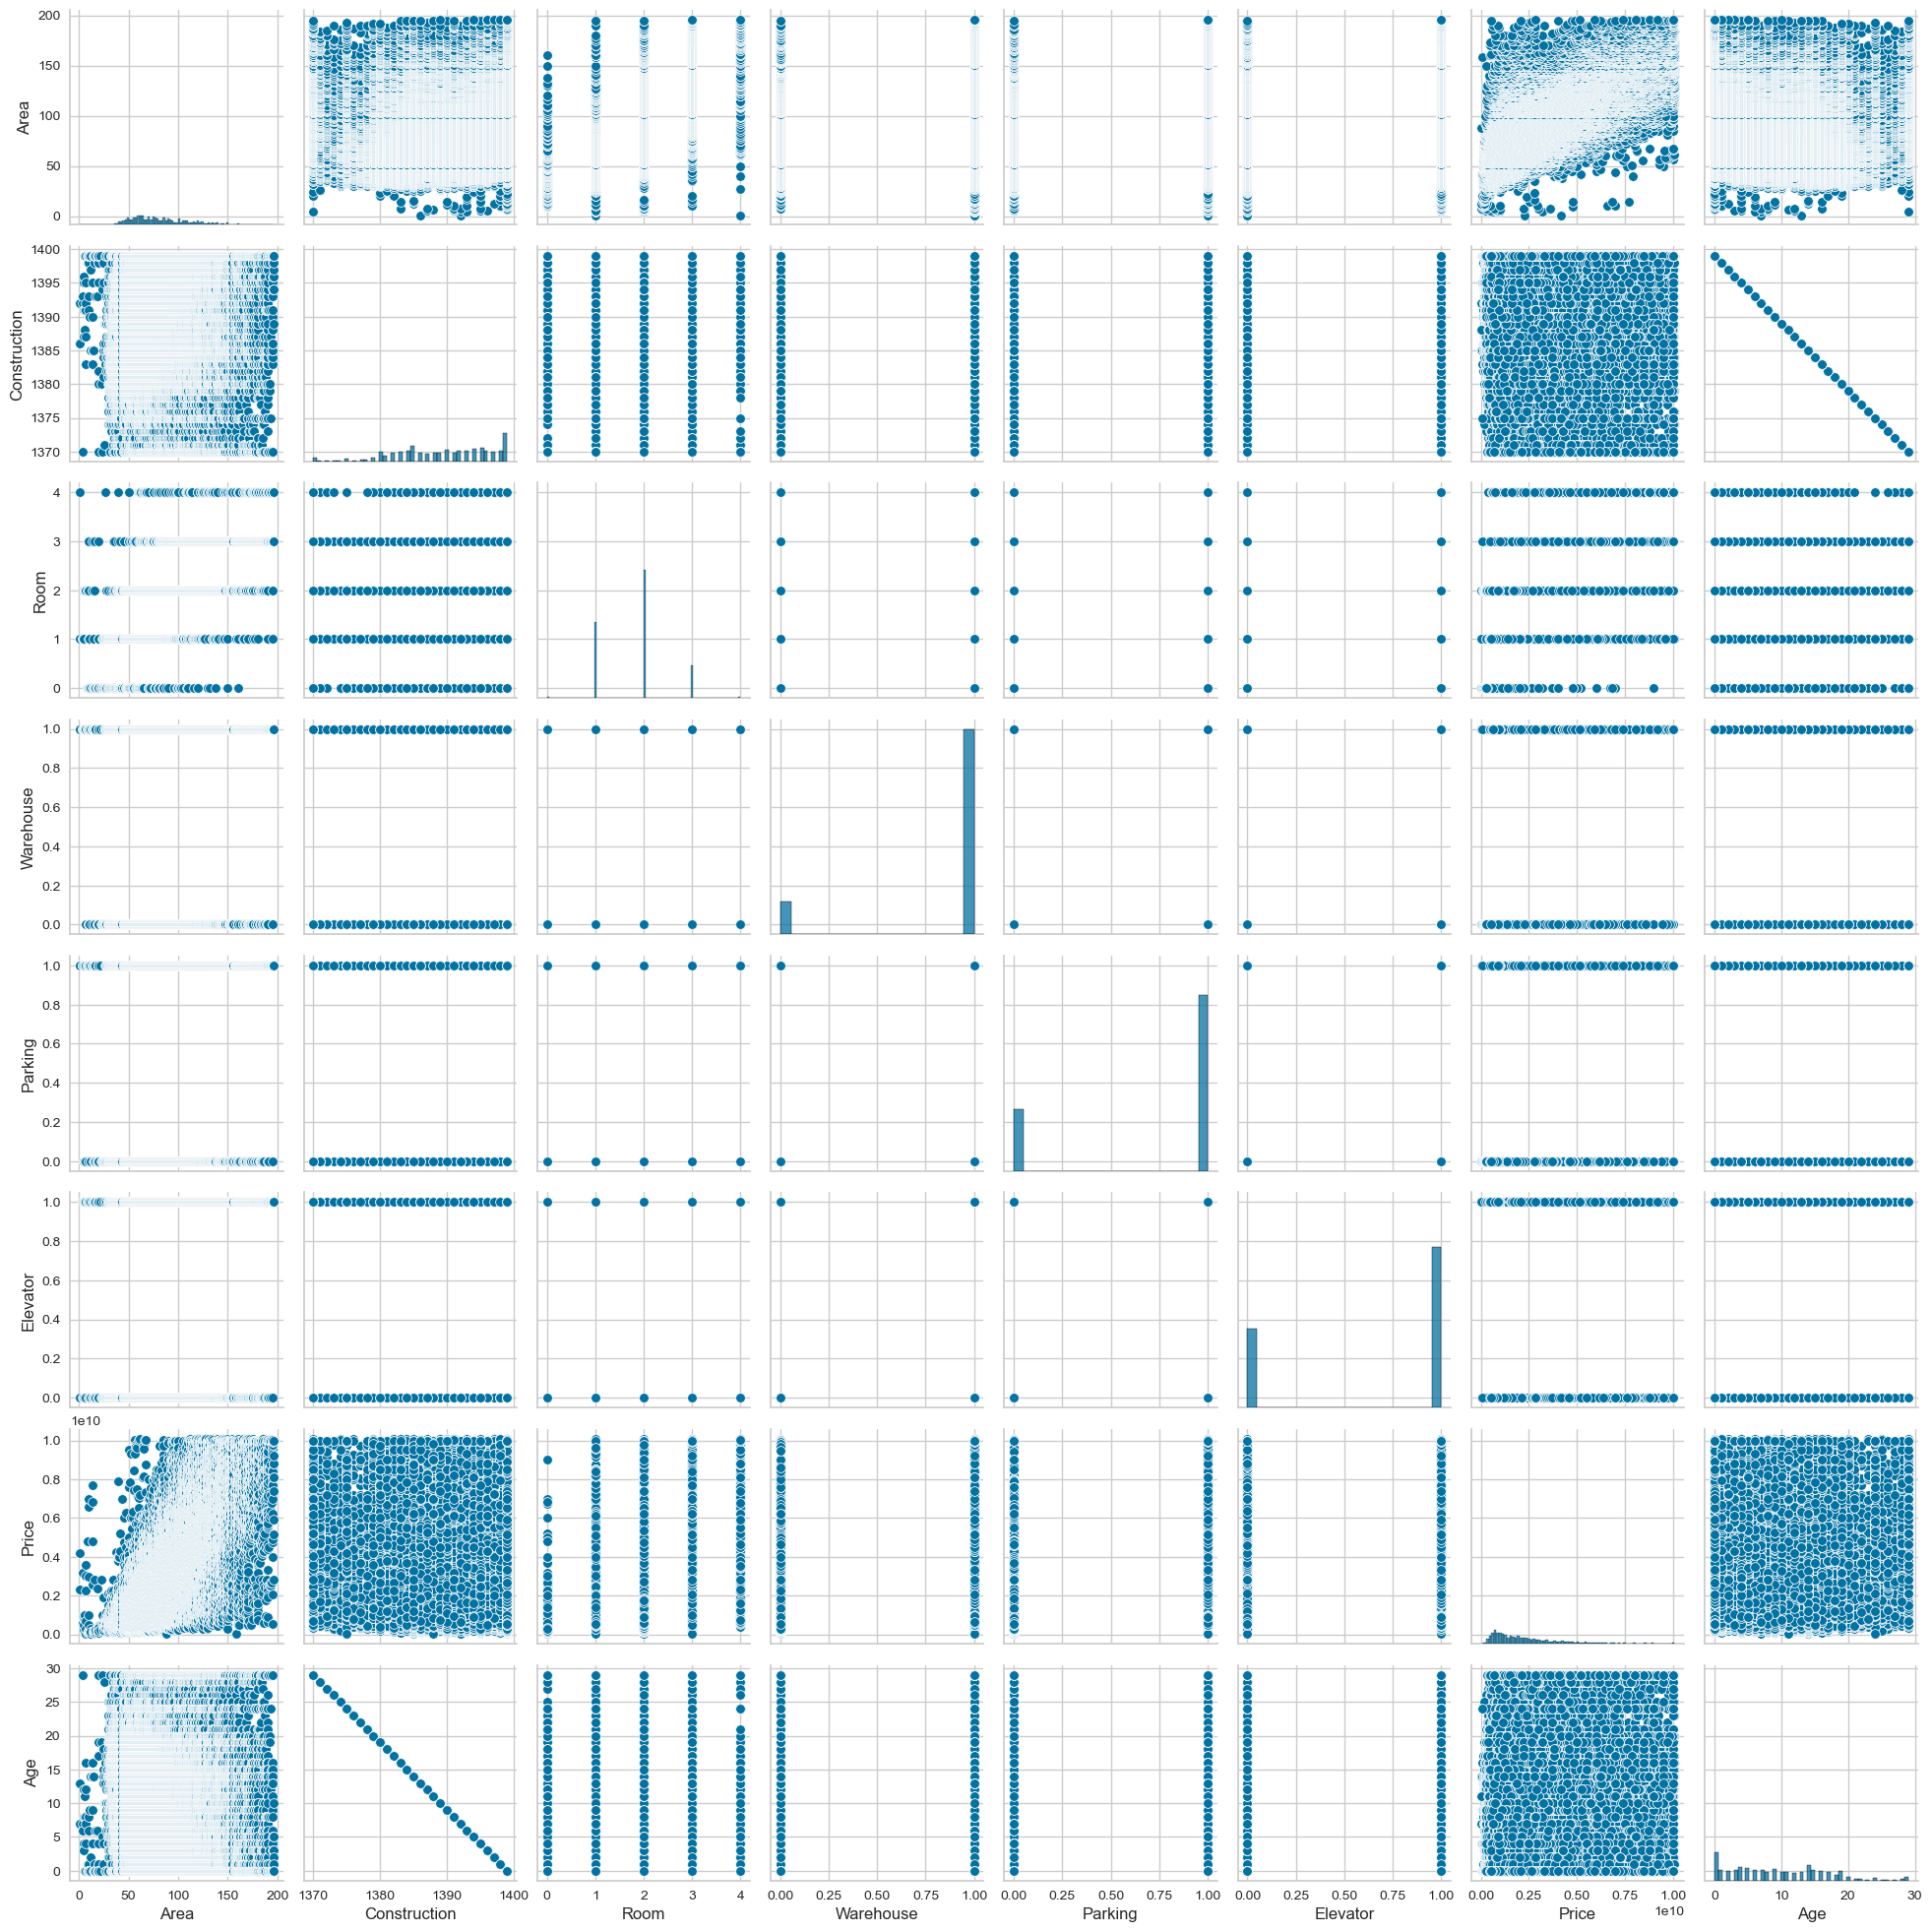

In [67]:
sns.pairplot(df20212)

<Axes: xlabel='Area', ylabel='Price'>

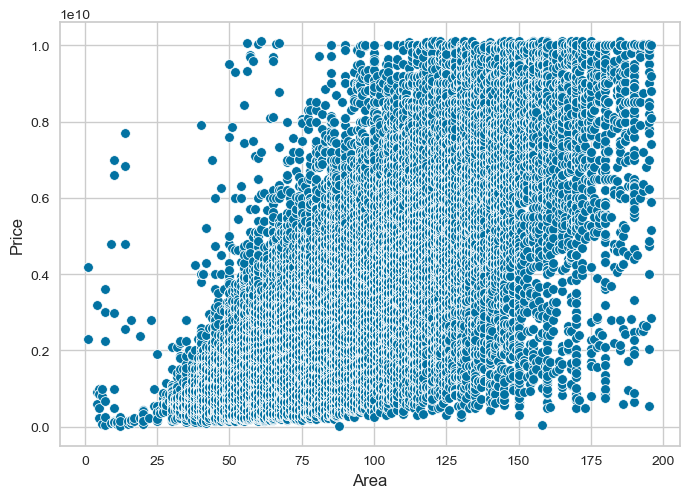

In [68]:
sns.scatterplot(df20212, x="Area",y="Price")

In [69]:
# s = c2df20212.copy()
# s.Area = s.Area.astype(float)
# sns.lmplot(s, x="Area",y="Price",line_kws=dict(color="r"))

<Axes: xlabel='Area', ylabel='Price'>

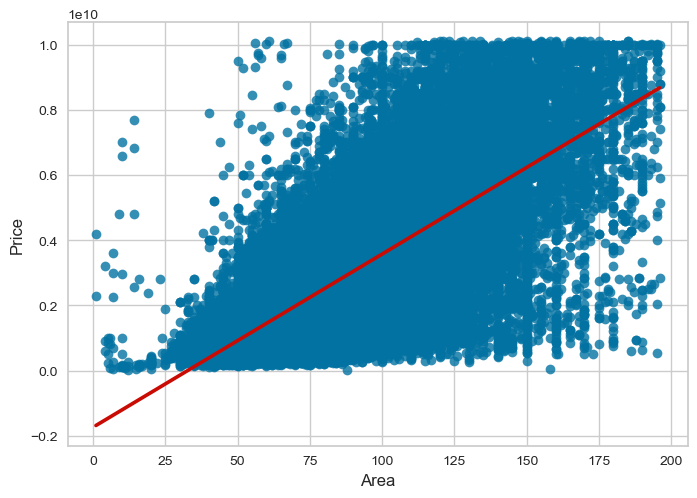

In [70]:
sns.regplot(df20212, x="Area",y="Price",line_kws=dict(color="r"))

<Axes: xlabel='Room', ylabel='Price'>

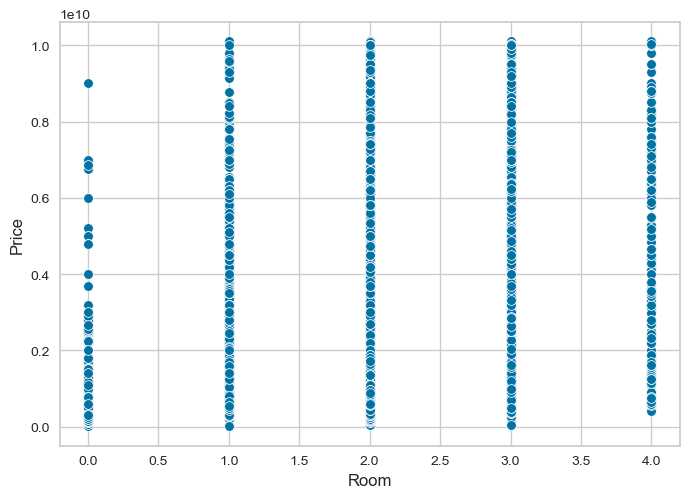

In [71]:
sns.scatterplot(df20212, x="Room",y="Price")

In [85]:
ndf20213 = ndf20212.drop(["Construction" , "Price_adj"],axis=1)
ndf20213

Area  Room  Warehouse  Parking  Elevator                District  \
0         5     1       True    False     False               رباط کریم   
1         6     2       True     True      True  دریاچه شهدای خلیج فارس   
2         7     2      False    False      True                    پرند   
3         7     2       True     True      True                    پرند   
4         9     0       True     True      True                   چیتگر   
...     ...   ...        ...      ...       ...                     ...   
69729   196     3       True     True      True                    کوهک   
69730   196     3       True     True      True  دریاچه شهدای خلیج فارس   
69731   196     3       True     True      True                 سهروردی   
69732   196     3       True     True      True                شهرک غرب   
69733   196     4       True     True      True                   چیتگر   

              Price  Age  
0      2.300000e+08    4  
1      8.000000e+07    0  
2      4.250000e+07    7  
3      2.670000e+08    0  
4      9.650000e+07    0  
...             ...  ...  
69729  9.200000e+09    1  
69730  5.150000e+09    0  
69731  1.000000e+10    0  
69732  1.568000e+10    0  
69733  5.900000e+09    0  

[69734 rows x 8 columns]

In [75]:
from pycaret.regression import RegressionExperiment
from pycaret.regression import get_config

In [102]:
exp = RegressionExperiment()
a = exp.setup(ndf20213, target='Price', session_id=1)

In [77]:
# get_config('X_train_transformed')

In [103]:
# compare baseline models
best = exp.compare_models()

Processing:   0%|          | 0/85 [00:00<?, ?it/s]

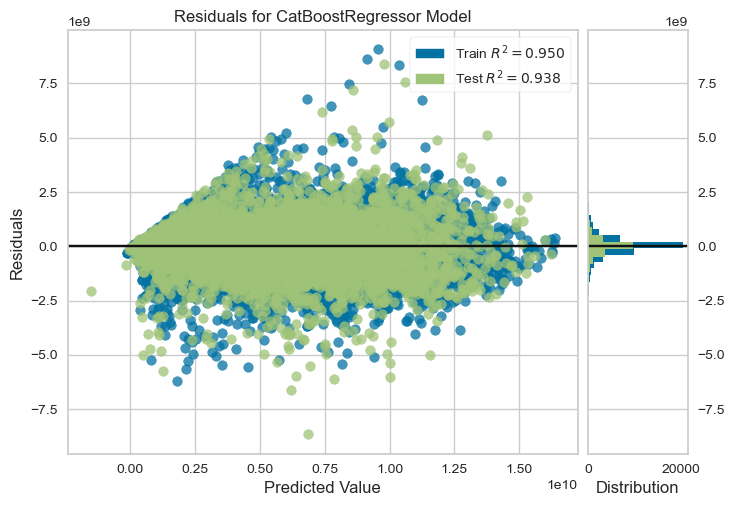

In [104]:
exp.plot_model(best, plot = 'residuals')

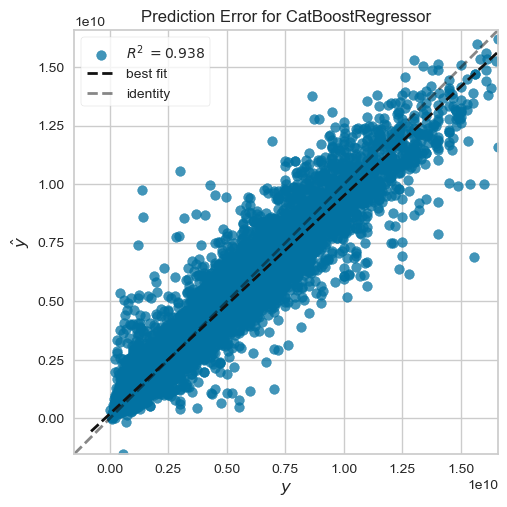

In [105]:
exp.plot_model(best, plot = 'error')

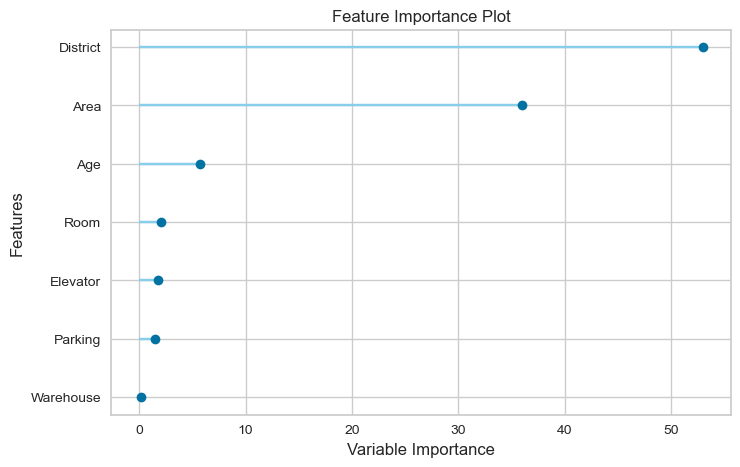

In [106]:
exp.plot_model(best, plot = 'feature')

In [99]:
#TEST 
exp2 = RegressionExperiment()
exp2.setup(ndf20213.drop("District",axis=1), target='Price', session_id=2)

In [100]:
# compare baseline models
best2 = exp2.compare_models()

Processing:   0%|          | 0/85 [00:00<?, ?it/s]

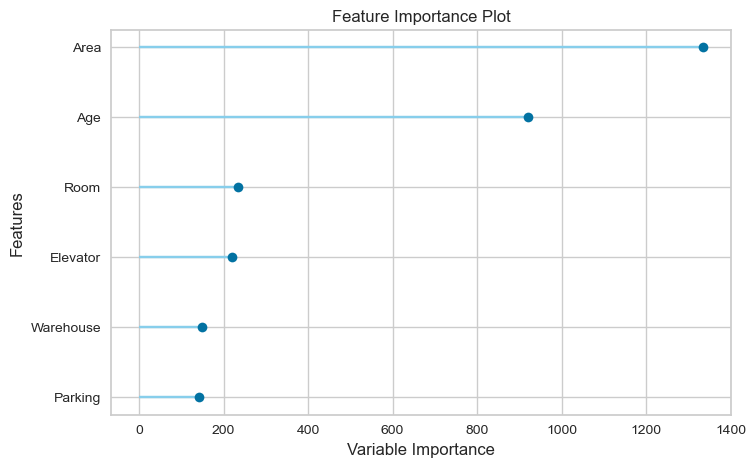

In [101]:
exp2.plot_model(best2, plot = 'feature')

In [108]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
# print ('Train set:', X_train.shape,  y_train.shape)
# print ('Test set:', X_test.shape,  y_test.shape)

## 2023 Data:

In [107]:
df2023

Area  Construction  Room  Warehouse  Parking  Elevator  \
0          1          1396     2       True     True      True   
1          1          1401     3       True     True      True   
2          3          1401     1       True     True      True   
3          4          1388     1      False     True      True   
4          5          1393     1       True    False      True   
...      ...           ...   ...        ...      ...       ...   
61722  17000          1400     2       True     True      True   
61723  17000          1401     4       True     True      True   
61724  20000          1401     4       True     True      True   
61725  20000          1401     4       True     True      True   
61726  36500          1401     2       True     True      True   

                     District         Price  
0                        ازگل  1.050000e+10  
1                دهکده المپیک  5.000000e+10  
2                شهرک راه‌آهن  3.200000e+08  
3                       جیحون  2.650000e+09  
4                       جیحون  3.200000e+09  
...                       ...           ...  
61722                    شریف  9.950000e+11  
61723  دریاچه شهدای خلیج فارس  9.000000e+11  
61724                شهرک غرب  3.000000e+11  
61725                مرزداران  5.950000e+11  
61726             شهرک ولیعصر  9.490000e+11  

[61727 rows x 8 columns]

In [109]:
df2023.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61727 entries, 0 to 61726
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Area          61727 non-null  int64  
 1   Construction  61727 non-null  int64  
 2   Room          61727 non-null  int64  
 3   Warehouse     61727 non-null  bool   
 4   Parking       61727 non-null  bool   
 5   Elevator      61727 non-null  bool   
 6   District      61727 non-null  object 
 7   Price         61727 non-null  float64
dtypes: bool(3), float64(1), int64(3), object(1)
memory usage: 2.5+ MB


In [110]:
df2023.describe()

Area  Construction          Room         Price
count  61727.000000  61727.000000  61727.000000  6.172700e+04
mean     125.151506   1391.377938      2.183437  1.411452e+10
std      309.739406      7.785743      0.799365  2.948882e+10
min        1.000000   1371.000000      1.000000  2.300000e+08
25%       70.000000   1385.000000      2.000000  4.452500e+09
50%      100.000000   1392.000000      2.000000  8.000000e+09
75%      140.000000   1399.000000      3.000000  1.450000e+10
max    36500.000000   1401.000000      4.000000  1.000000e+12

In [111]:
df2023["Age"] = df2023.Construction.apply(lambda x : 1401 - x )
df2023

Area  Construction  Room  Warehouse  Parking  Elevator  \
0          1          1396     2       True     True      True   
1          1          1401     3       True     True      True   
2          3          1401     1       True     True      True   
3          4          1388     1      False     True      True   
4          5          1393     1       True    False      True   
...      ...           ...   ...        ...      ...       ...   
61722  17000          1400     2       True     True      True   
61723  17000          1401     4       True     True      True   
61724  20000          1401     4       True     True      True   
61725  20000          1401     4       True     True      True   
61726  36500          1401     2       True     True      True   

                     District         Price  Age  
0                        ازگل  1.050000e+10    5  
1                دهکده المپیک  5.000000e+10    0  
2                شهرک راه‌آهن  3.200000e+08    0  
3                       جیحون  2.650000e+09   13  
4                       جیحون  3.200000e+09    8  
...                       ...           ...  ...  
61722                    شریف  9.950000e+11    1  
61723  دریاچه شهدای خلیج فارس  9.000000e+11    0  
61724                شهرک غرب  3.000000e+11    0  
61725                مرزداران  5.950000e+11    0  
61726             شهرک ولیعصر  9.490000e+11    0  

[61727 rows x 9 columns]

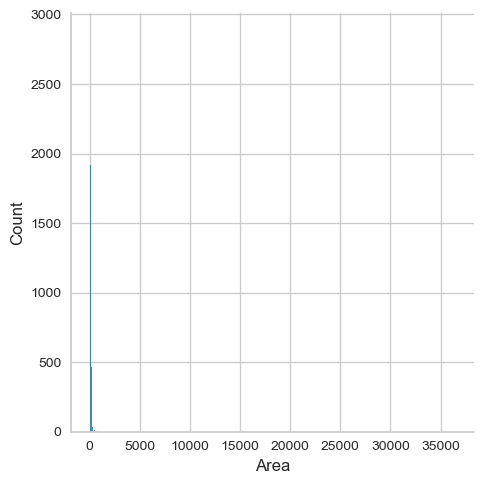

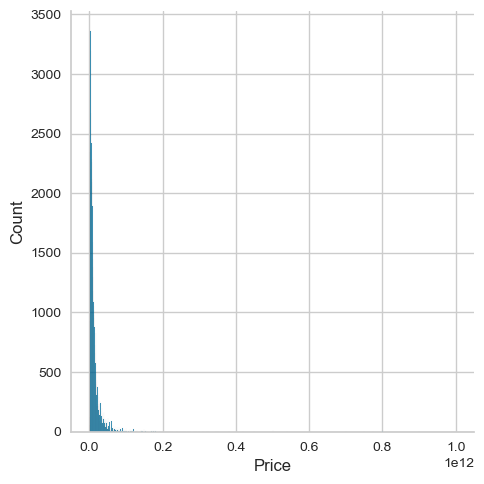

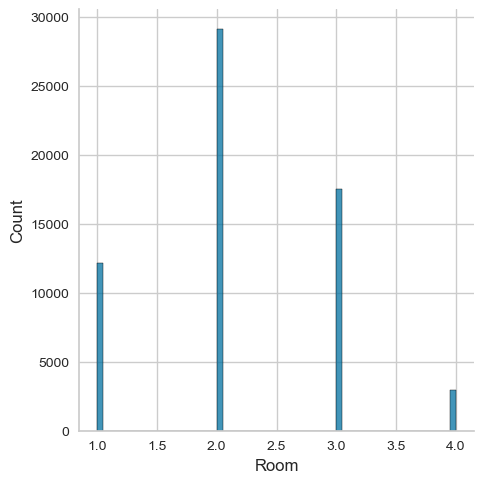

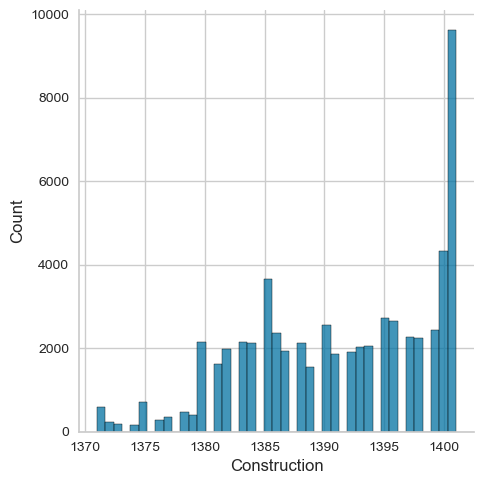

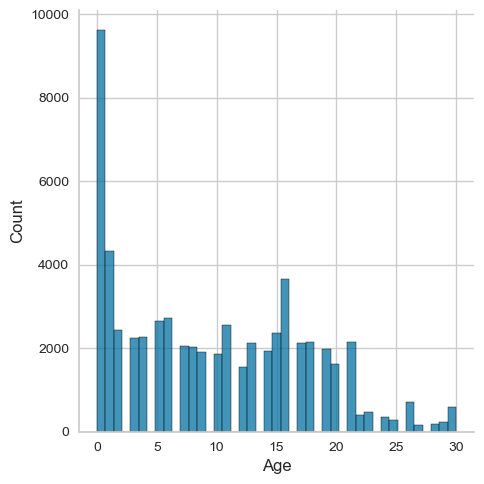

In [112]:
sns.displot(df2023, x="Area")
sns.displot(df2023, x="Price")
sns.displot(df2023, x="Room")
sns.displot(df2023, x="Construction")
sns.displot(df2023, x="Age")

<Axes: xlabel='Area'>

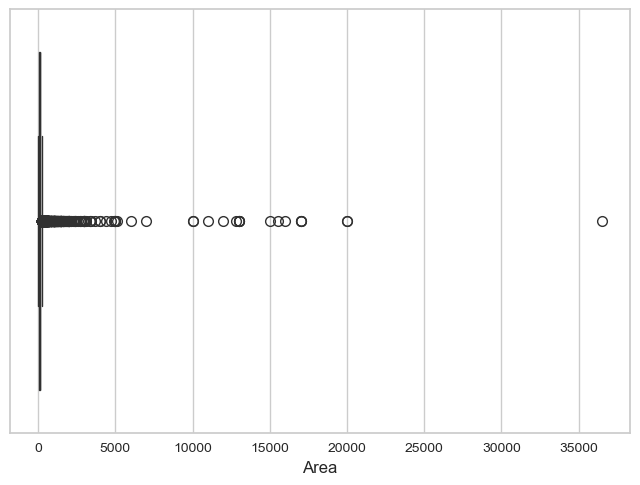

In [113]:
sns.boxplot(df2023, x="Area")

<Axes: xlabel='Price'>

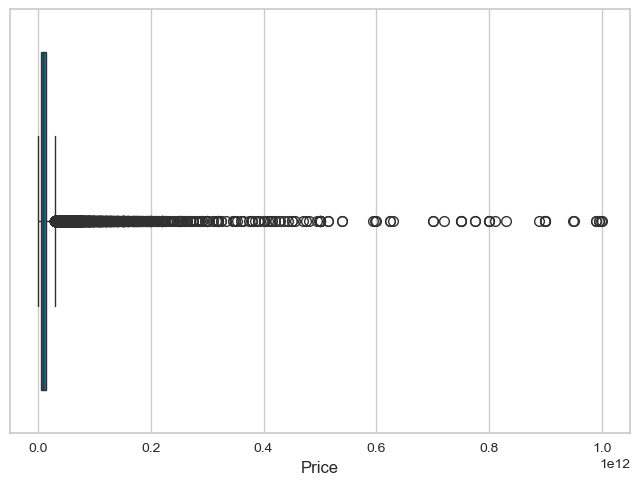

In [114]:
sns.boxplot(df2023, x="Price")

In [115]:
df2023.corr()

Area  Construction      Room  Warehouse   Parking  Elevator  \
Area          1.000000      0.081399  0.221982   0.089128  0.082531  0.041499   
Construction  0.081399      1.000000  0.222791   0.583540  0.336030  0.068804   
Room          0.221982      0.222791  1.000000   0.355480  0.373405  0.176257   
Warehouse     0.089128      0.583540  0.355480   1.000000  0.447787  0.127912   
Parking       0.082531      0.336030  0.373405   0.447787  1.000000  0.209942   
Elevator      0.041499      0.068804  0.176257   0.127912  0.209942  1.000000   
Price         0.608480      0.169176  0.406990   0.170270  0.154429  0.085878   
Age          -0.081399     -1.000000 -0.222791  -0.583540 -0.336030 -0.068804   

                 Price       Age  
Area          0.608480 -0.081399  
Construction  0.169176 -1.000000  
Room          0.406990 -0.222791  
Warehouse     0.170270 -0.583540  
Parking       0.154429 -0.336030  
Elevator      0.085878 -0.068804  
Price         1.000000 -0.169176  
Age          -0.169176  1.000000

<Axes: >

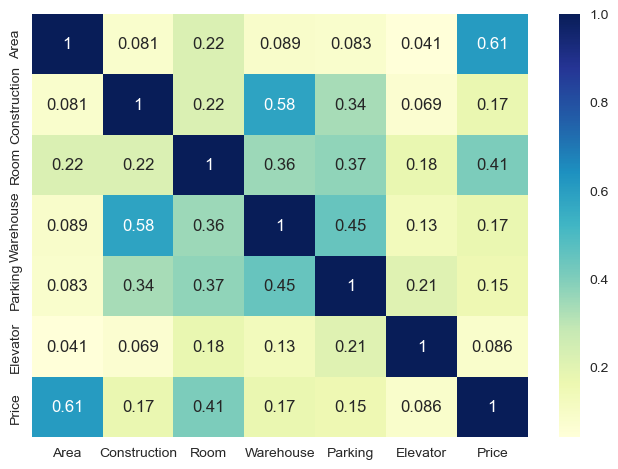

In [116]:
sns.heatmap(df2023.drop("Age",axis =1).corr(),annot=True,cmap="YlGnBu")

### Remove outliers using IQR(non-parametic)

In [117]:
Q3_area = df2023["Area"].quantile(q=0.75,interpolation="midpoint") 
Q1_area = df2023["Area"].quantile(q=0.25,interpolation="midpoint") 
IQR_area = Q3_area - Q1_area
df20231 = df2023[df2023.Area.between(Q1_area - 1.5*IQR_area , Q3_area + 1.5*IQR_area)]
df20231 = df20231.reset_index(drop=True)
df20231

Area  Construction  Room  Warehouse  Parking  Elevator      District  \
0         1          1396     2       True     True      True          ازگل   
1         1          1401     3       True     True      True  دهکده المپیک   
2         3          1401     1       True     True      True  شهرک راه‌آهن   
3         4          1388     1      False     True      True         جیحون   
4         5          1393     1       True    False      True         جیحون   
...     ...           ...   ...        ...      ...       ...           ...   
58435   245          1401     4       True     True      True       محمودیه   
58436   245          1401     4       True     True      True      مرزداران   
58437   245          1401     4       True     True      True       هفت حوض   
58438   245          1401     4       True     True      True         ولنجک   
58439   245          1401     4       True     True      True      پاسداران   

              Price  Age  
0      1.050000e+10    5  
1      5.000000e+10    0  
2      3.200000e+08    0  
3      2.650000e+09   13  
4      3.200000e+09    8  
...             ...  ...  
58435  3.920000e+10    0  
58436  4.165000e+10    0  
58437  1.940000e+10    0  
58438  5.000000e+10    0  
58439  3.425000e+10    0  

[58440 rows x 9 columns]

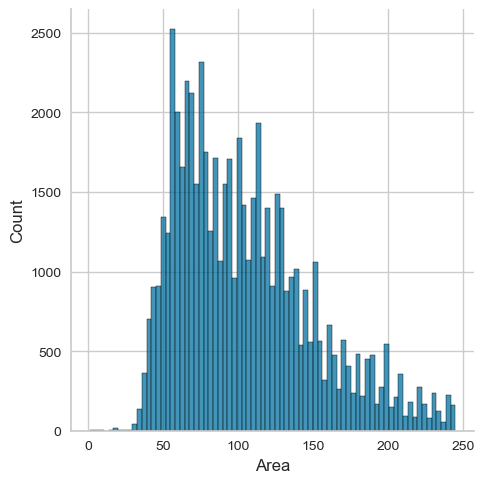

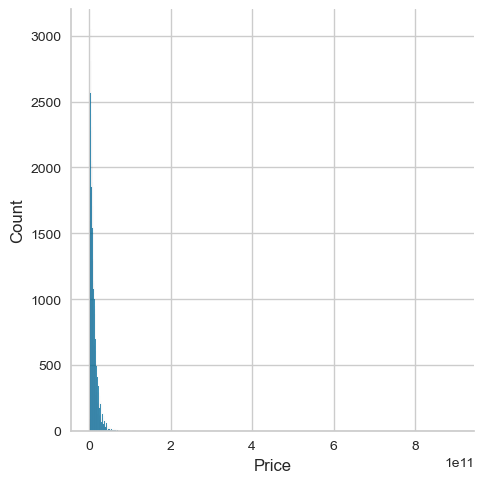

In [118]:
sns.displot(df20231, x="Area")
sns.displot(df20231, x="Price")

In [119]:
Q3_price = df2023["Price"].quantile(q=0.75,interpolation="midpoint") 
Q1_price = df2023["Price"].quantile(q=0.25,interpolation="midpoint") 
IQR_price = Q3_price - Q1_price
df20232 = df20231[df20231.Price.between(Q1_price - 1.5*IQR_price , Q3_price + 1.5*IQR_price)]
df20232 = df20232.reset_index(drop=True)
df20232

Area  Construction  Room  Warehouse  Parking  Elevator  \
0         1          1396     2       True     True      True   
1         3          1401     1       True     True      True   
2         4          1388     1      False     True      True   
3         5          1393     1       True    False      True   
4         5          1401     1       True     True      True   
...     ...           ...   ...        ...      ...       ...   
55905   245          1398     4       True     True      True   
55906   245          1401     3       True     True      True   
55907   245          1401     4       True     True      True   
55908   245          1401     4       True     True      True   
55909   245          1401     4       True     True      True   

                     District         Price  Age  
0                        ازگل  1.050000e+10    5  
1                شهرک راه‌آهن  3.200000e+08    0  
2                       جیحون  2.650000e+09   13  
3                       جیحون  3.200000e+09    8  
4      دریاچه شهدای خلیج فارس  2.300000e+08    0  
...                       ...           ...  ...  
55905  دریاچه شهدای خلیج فارس  7.350000e+09    3  
55906  دریاچه شهدای خلیج فارس  6.860000e+09    0  
55907          جنت‌آباد جنوبی  2.695000e+10    0  
55908  دریاچه شهدای خلیج فارس  1.210000e+10    0  
55909                 هفت حوض  1.940000e+10    0  

[55910 rows x 9 columns]

<Axes: xlabel='Area'>

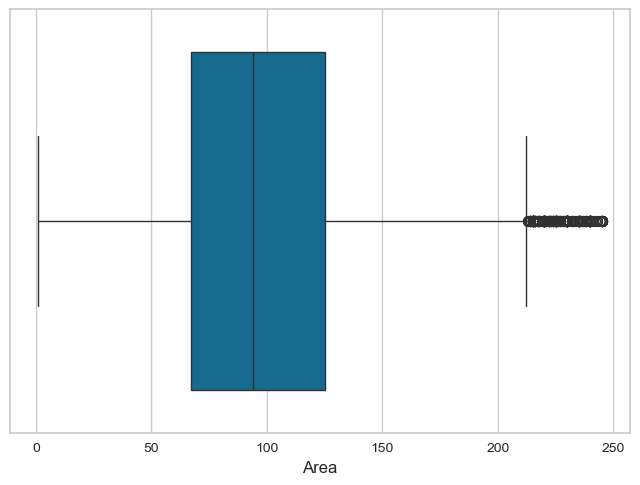

In [120]:
sns.boxplot(df20232, x="Area")

<Axes: xlabel='Price'>

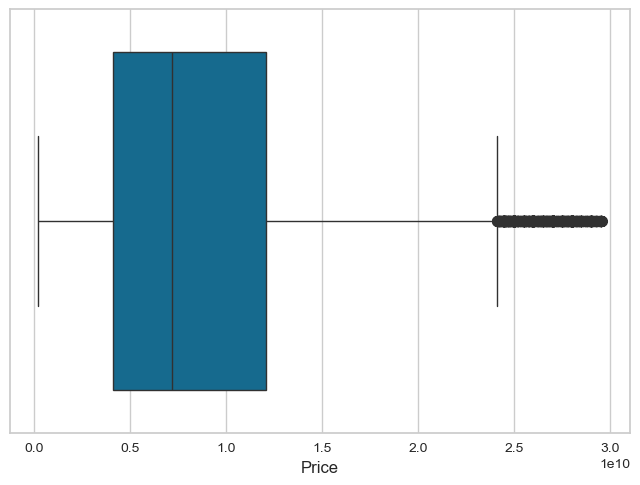

In [121]:
sns.boxplot(df20232, x="Price")

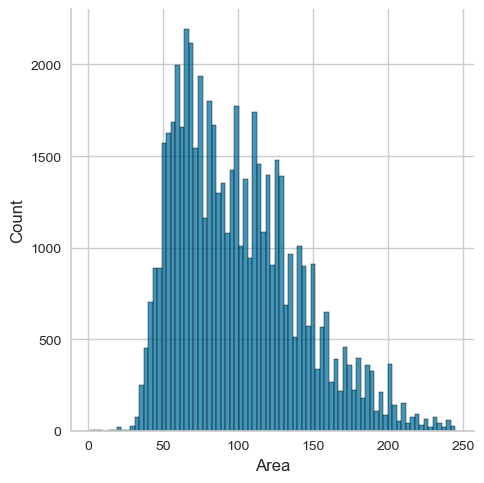

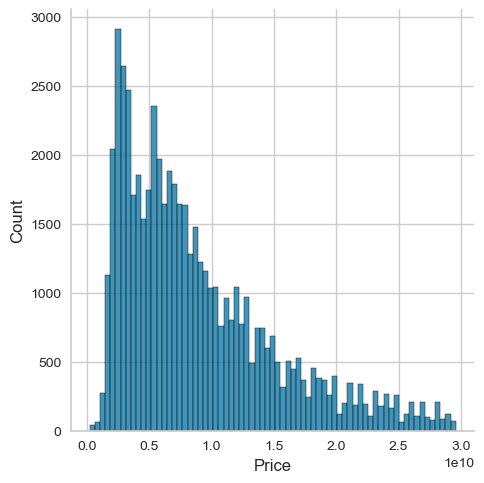

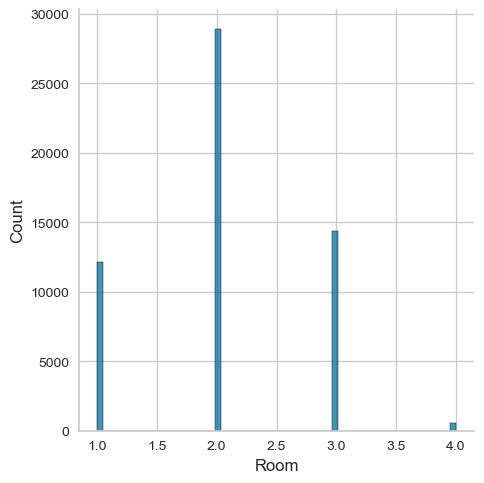

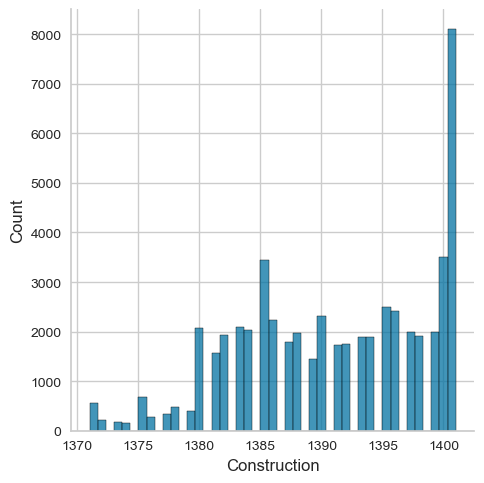

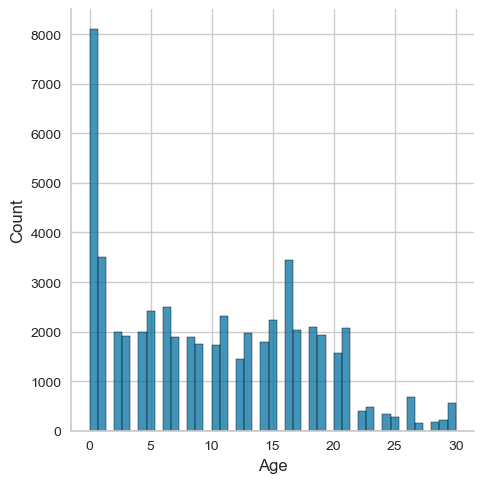

In [122]:
sns.displot(df20232, x="Area")
sns.displot(df20232, x="Price")
sns.displot(df20232, x="Room")
sns.displot(df20232, x="Construction")
sns.displot(df20232, x="Age")

### New Approach:

In [123]:
ndf2023 = df2023.copy()

In [124]:
ndf2023["Price_adj"] = ndf2023.Price / ndf2023.Area
ndf2023

Area  Construction  Room  Warehouse  Parking  Elevator  \
0          1          1396     2       True     True      True   
1          1          1401     3       True     True      True   
2          3          1401     1       True     True      True   
3          4          1388     1      False     True      True   
4          5          1393     1       True    False      True   
...      ...           ...   ...        ...      ...       ...   
61722  17000          1400     2       True     True      True   
61723  17000          1401     4       True     True      True   
61724  20000          1401     4       True     True      True   
61725  20000          1401     4       True     True      True   
61726  36500          1401     2       True     True      True   

                     District         Price  Age     Price_adj  
0                        ازگل  1.050000e+10    5  1.050000e+10  
1                دهکده المپیک  5.000000e+10    0  5.000000e+10  
2                شهرک راه‌آهن  3.200000e+08    0  1.066667e+08  
3                       جیحون  2.650000e+09   13  6.625000e+08  
4                       جیحون  3.200000e+09    8  6.400000e+08  
...                       ...           ...  ...           ...  
61722                    شریف  9.950000e+11    1  5.852941e+07  
61723  دریاچه شهدای خلیج فارس  9.000000e+11    0  5.294118e+07  
61724                شهرک غرب  3.000000e+11    0  1.500000e+07  
61725                مرزداران  5.950000e+11    0  2.975000e+07  
61726             شهرک ولیعصر  9.490000e+11    0  2.600000e+07  

[61727 rows x 10 columns]

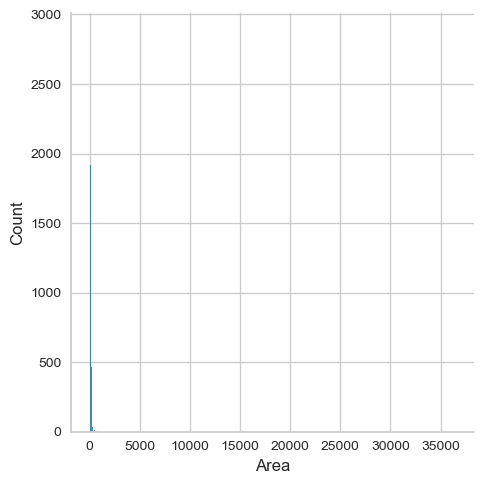

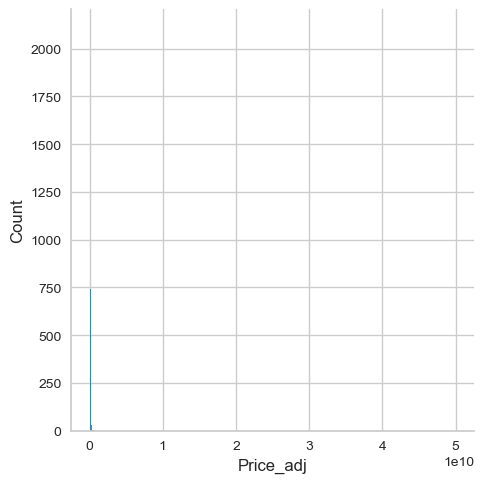

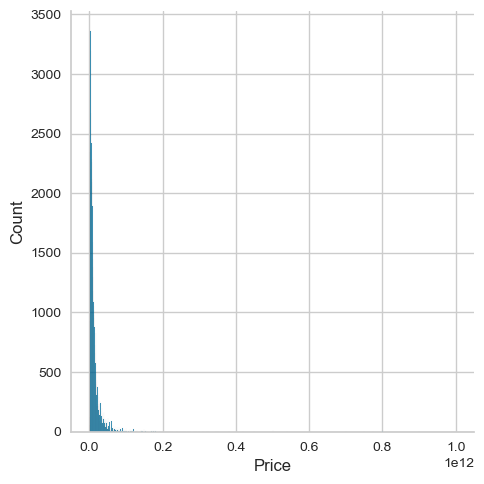

In [125]:
sns.displot(ndf2023, x="Area")
sns.displot(ndf2023, x="Price_adj")
sns.displot(ndf2023, x="Price")

In [126]:
Q3_price_adj = ndf2023["Price_adj"].quantile(q=0.75,interpolation="midpoint") 
Q1_price_adj = ndf2023["Price_adj"].quantile(q=0.25,interpolation="midpoint") 
IQR_price = Q3_price_adj - Q1_price_adj
ndf20231 = ndf2023[ndf2023.Price_adj.between(Q1_price_adj - 1.5*IQR_price , Q3_price_adj + 1.5*IQR_price)]
ndf20231 = ndf20231.reset_index(drop=True)
ndf20231

Area  Construction  Room  Warehouse  Parking  Elevator  \
0          3          1401     1       True     True      True   
1          5          1401     1       True     True      True   
2          5          1401     2       True     True      True   
3          7          1401     1       True     True      True   
4         10          1401     1       True     True      True   
...      ...           ...   ...        ...      ...       ...   
59078  17000          1400     2       True     True      True   
59079  17000          1401     4       True     True      True   
59080  20000          1401     4       True     True      True   
59081  20000          1401     4       True     True      True   
59082  36500          1401     2       True     True      True   

                     District         Price  Age     Price_adj  
0                شهرک راه‌آهن  3.200000e+08    0  1.066667e+08  
1      دریاچه شهدای خلیج فارس  2.300000e+08    0  4.600000e+07  
2      دریاچه شهدای خلیج فارس  2.300000e+08    0  4.600000e+07  
3                       چیتگر  2.450000e+08    0  3.500000e+07  
4      دریاچه شهدای خلیج فارس  5.650000e+08    0  5.650000e+07  
...                       ...           ...  ...           ...  
59078                    شریف  9.950000e+11    1  5.852941e+07  
59079  دریاچه شهدای خلیج فارس  9.000000e+11    0  5.294118e+07  
59080                شهرک غرب  3.000000e+11    0  1.500000e+07  
59081                مرزداران  5.950000e+11    0  2.975000e+07  
59082             شهرک ولیعصر  9.490000e+11    0  2.600000e+07  

[59083 rows x 10 columns]

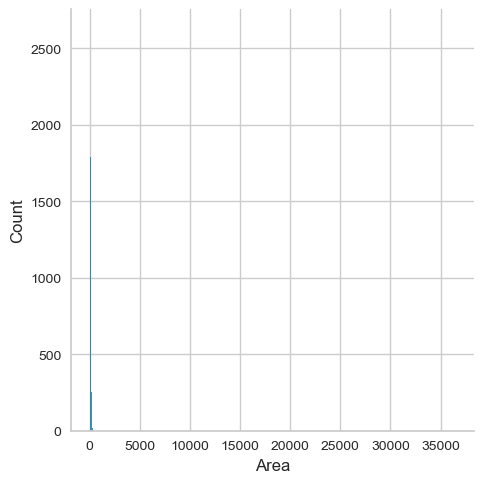

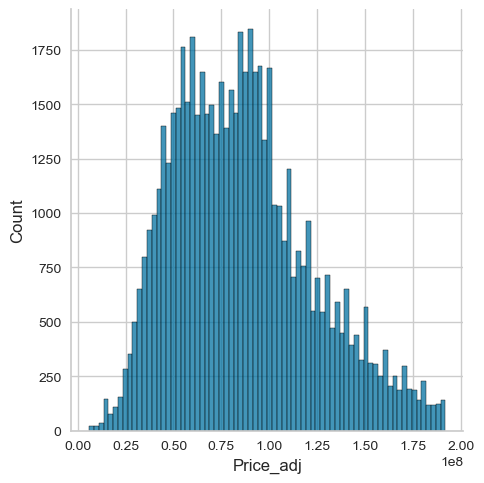

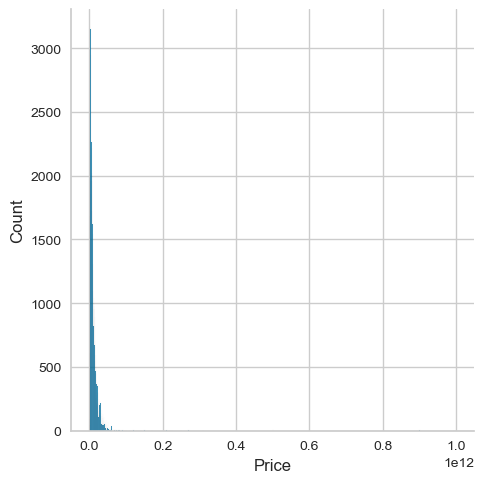

In [127]:
sns.displot(ndf20231, x="Area")
sns.displot(ndf20231, x="Price_adj")
sns.displot(ndf20231, x="Price")

In [128]:
Q3_Area = ndf2023["Area"].quantile(q=0.75,interpolation="midpoint") 
Q1_Area = ndf2023["Area"].quantile(q=0.25,interpolation="midpoint") 
IQR_price = Q3_Area - Q1_Area
ndf20232 = ndf20231[ndf20231.Area.between(Q1_Area - 1.5*IQR_price , Q3_Area + 1.5*IQR_price)]
ndf20232 = ndf20232.reset_index(drop=True)
ndf20232

Area  Construction  Room  Warehouse  Parking  Elevator  \
0         3          1401     1       True     True      True   
1         5          1401     1       True     True      True   
2         5          1401     2       True     True      True   
3         7          1401     1       True     True      True   
4        10          1401     1       True     True      True   
...     ...           ...   ...        ...      ...       ...   
57107   245          1401     4       True     True      True   
57108   245          1401     4       True     True      True   
57109   245          1401     4       True     True      True   
57110   245          1401     4       True     True      True   
57111   245          1401     4       True     True      True   

                     District         Price  Age     Price_adj  
0                شهرک راه‌آهن  3.200000e+08    0  1.066667e+08  
1      دریاچه شهدای خلیج فارس  2.300000e+08    0  4.600000e+07  
2      دریاچه شهدای خلیج فارس  2.300000e+08    0  4.600000e+07  
3                       چیتگر  2.450000e+08    0  3.500000e+07  
4      دریاچه شهدای خلیج فارس  5.650000e+08    0  5.650000e+07  
...                       ...           ...  ...           ...  
57107              سعادت‌آباد  4.025000e+10    0  1.642857e+08  
57108                 محمودیه  3.920000e+10    0  1.600000e+08  
57109                مرزداران  4.165000e+10    0  1.700000e+08  
57110                 هفت حوض  1.940000e+10    0  7.918367e+07  
57111                پاسداران  3.425000e+10    0  1.397959e+08  

[57112 rows x 10 columns]

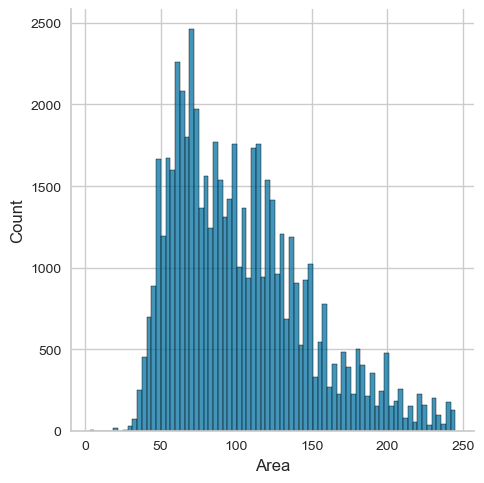

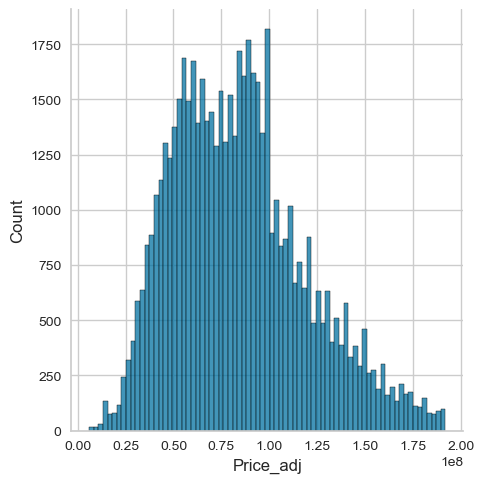

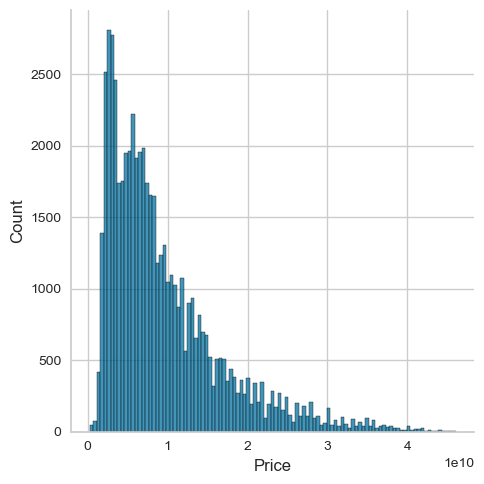

In [129]:
sns.displot(ndf20232, x="Area")
sns.displot(ndf20232, x="Price_adj")
sns.displot(ndf20232, x="Price")

In [130]:
ndf20232.describe()

Area  Construction          Room         Price           Age  \
count  57112.000000  57112.000000  57112.000000  5.711200e+04  57112.000000   
mean     103.211024   1391.043476      2.086287  9.529795e+09      9.956524   
std       44.068434      7.772754      0.726011  7.307507e+09      7.772754   
min        3.000000   1371.000000      1.000000  2.300000e+08      0.000000   
25%       68.000000   1385.000000      2.000000  4.185000e+09      3.000000   
50%       95.000000   1392.000000      2.000000  7.400000e+09      9.000000   
75%      129.000000   1398.000000      3.000000  1.260000e+10     16.000000   
max      245.000000   1401.000000      4.000000  4.606000e+10     30.000000   

          Price_adj  
count  5.711200e+04  
mean   8.437737e+07  
std    3.488358e+07  
min    5.917160e+06  
25%    5.766667e+07  
50%    8.125000e+07  
75%    1.046154e+08  
max    1.920732e+08

In [131]:
ndf20231.to_csv("2023_v4.csv",index=False)
ndf20232.to_csv("2023_v4_Area.csv",index=False)

### .........................................................................................

In [133]:
df20232.corr()

Area  Construction      Room  Warehouse   Parking  Elevator  \
Area          1.000000      0.204077  0.822431   0.383622  0.384249  0.167041   
Construction  0.204077      1.000000  0.180851   0.585743  0.330559  0.057369   
Room          0.822431      0.180851  1.000000   0.331149  0.364006  0.160681   
Warehouse     0.383622      0.585743  0.331149   1.000000  0.436234  0.116031   
Parking       0.384249      0.330559  0.364006   0.436234  1.000000  0.200863   
Elevator      0.167041      0.057369  0.160681   0.116031  0.200863  1.000000   
Price         0.832094      0.210379  0.666667   0.396900  0.390640  0.196698   
Age          -0.204077     -1.000000 -0.180851  -0.585743 -0.330559 -0.057369   

                 Price       Age  
Area          0.832094 -0.204077  
Construction  0.210379 -1.000000  
Room          0.666667 -0.180851  
Warehouse     0.396900 -0.585743  
Parking       0.390640 -0.330559  
Elevator      0.196698 -0.057369  
Price         1.000000 -0.210379  
Age          -0.210379  1.000000

<Axes: >

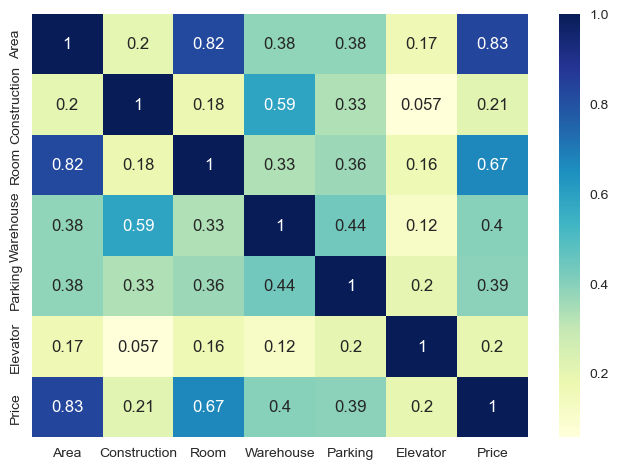

In [135]:
sns.heatmap(df20232.drop("Age",axis=1).corr(),annot=True,cmap="YlGnBu")

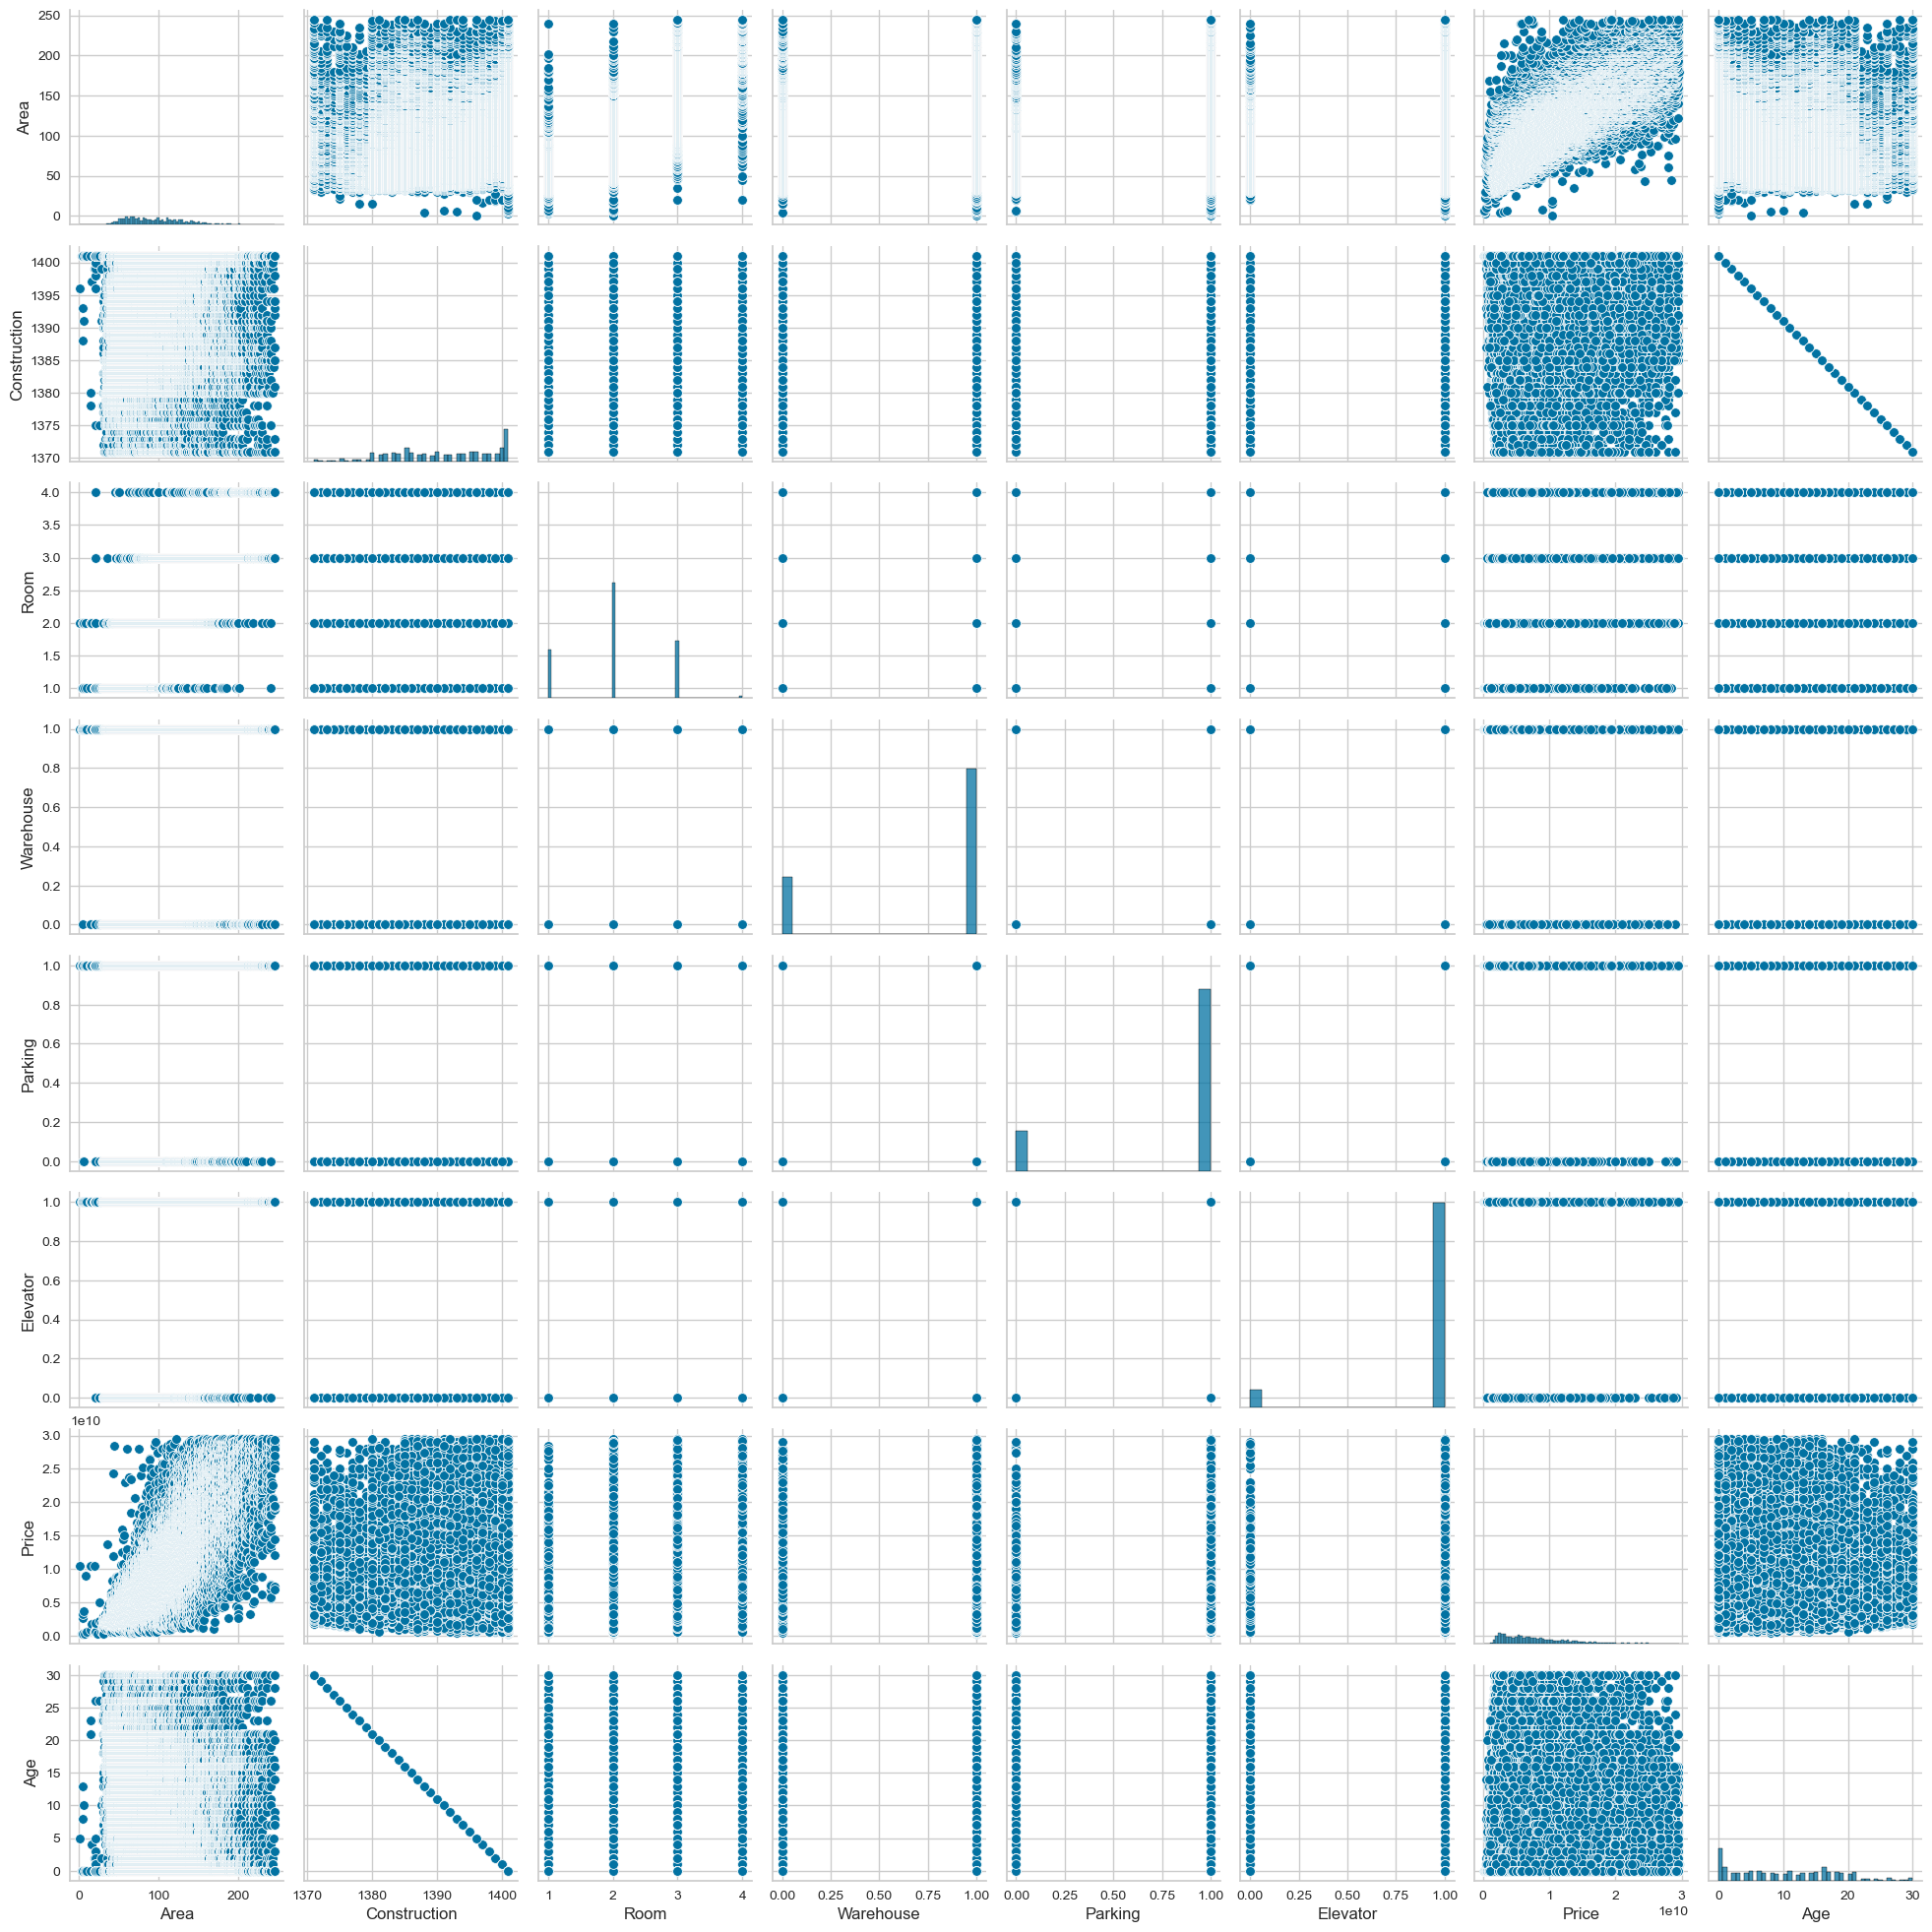

In [136]:
sns.pairplot(df20232)

<Axes: xlabel='Area', ylabel='Price'>

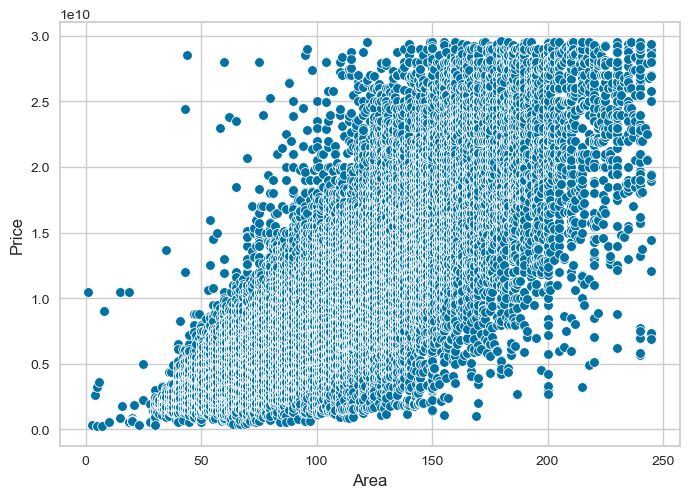

In [142]:
sns.scatterplot(df20232, x="Area",y="Price")

<Axes: xlabel='Area', ylabel='Price'>

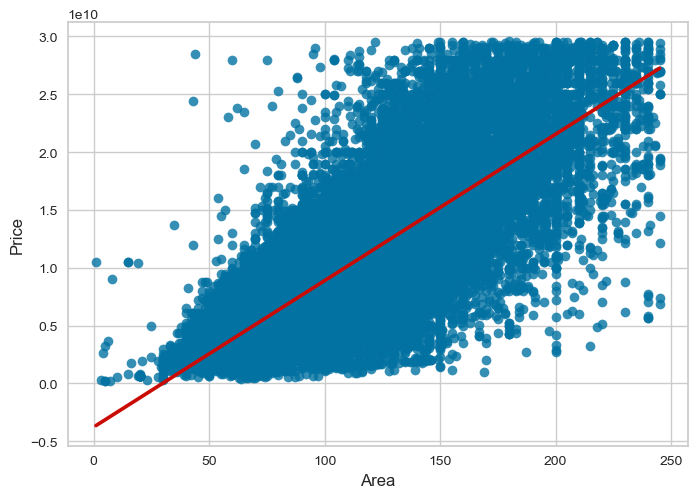

In [143]:
sns.regplot(df20232, x="Area",y="Price",line_kws=dict(color="r"))

In [144]:
ndf20233 = ndf20232.drop(["Construction","Price_adj"],axis=1)
ndf20233

Area  Room  Warehouse  Parking  Elevator                District  \
0         3     1       True     True      True            شهرک راه‌آهن   
1         5     1       True     True      True  دریاچه شهدای خلیج فارس   
2         5     2       True     True      True  دریاچه شهدای خلیج فارس   
3         7     1       True     True      True                   چیتگر   
4        10     1       True     True      True  دریاچه شهدای خلیج فارس   
...     ...   ...        ...      ...       ...                     ...   
57107   245     4       True     True      True              سعادت‌آباد   
57108   245     4       True     True      True                 محمودیه   
57109   245     4       True     True      True                مرزداران   
57110   245     4       True     True      True                 هفت حوض   
57111   245     4       True     True      True                پاسداران   

              Price  Age  
0      3.200000e+08    0  
1      2.300000e+08    0  
2      2.300000e+08    0  
3      2.450000e+08    0  
4      5.650000e+08    0  
...             ...  ...  
57107  4.025000e+10    0  
57108  3.920000e+10    0  
57109  4.165000e+10    0  
57110  1.940000e+10    0  
57111  3.425000e+10    0  

[57112 rows x 8 columns]

In [145]:
len(df20233.District.unique())

337

In [146]:
from pycaret.regression import RegressionExperiment
from pycaret.regression import get_config

In [147]:
exp = RegressionExperiment()
a = exp.setup(ndf20233, target='Price', session_id=123)

In [148]:
best = exp.compare_models()

Processing:   0%|          | 0/85 [00:00<?, ?it/s]

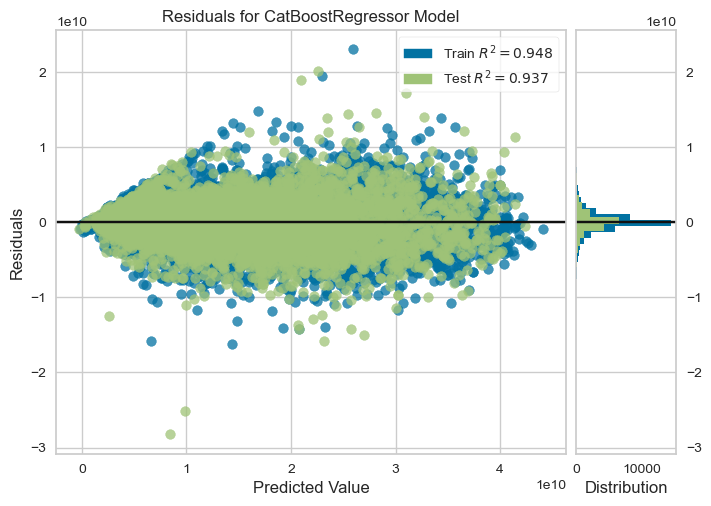

In [149]:
exp.plot_model(best, plot = 'residuals')

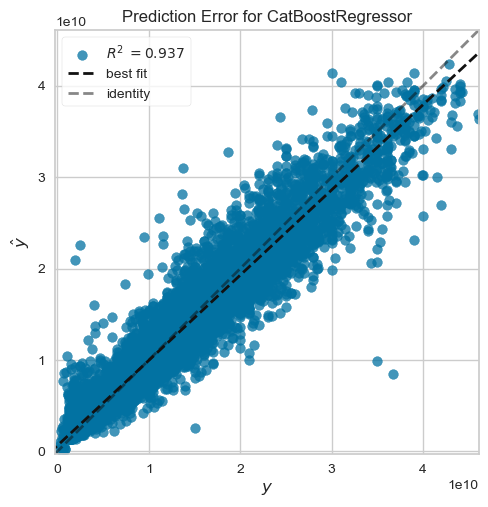

In [150]:
exp.plot_model(best, plot = 'error')

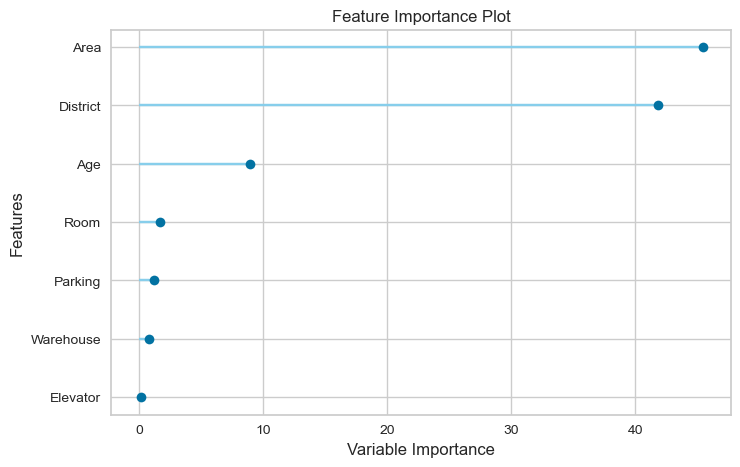

In [151]:
exp.plot_model(best, plot = 'feature')

In [152]:
exp2 = RegressionExperiment()
exp2.setup(ndf20233.drop("District",axis =1), target='Price', session_id=123)

In [153]:
best2 = exp2.compare_models()

Processing:   0%|          | 0/85 [00:00<?, ?it/s]

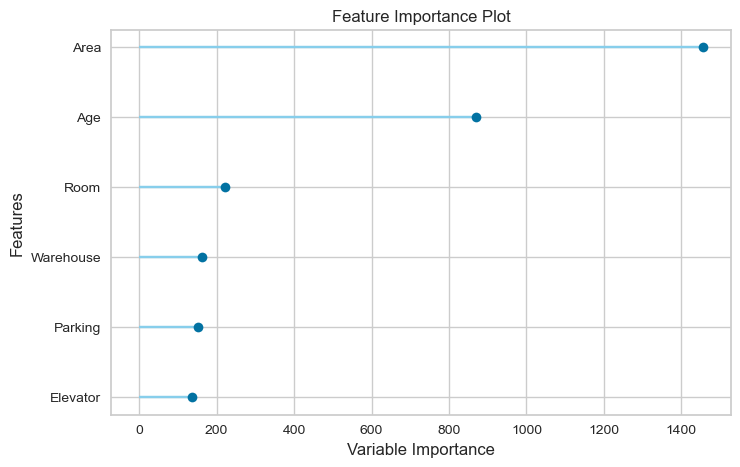

In [154]:
exp2.plot_model(best2, plot = 'feature')

In [91]:
# df20212.to_csv("2021_v4.csv",index=False)
# df20232.to_csv("2023_v4.csv",index=False)